<a href="https://colab.research.google.com/github/Otibhor-irene/Final-project-tools-for-data-science-by-lbm/blob/main/Team_Berlin_FLU_SHOT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

###################################
#            PACKAGES             #
###################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import spearmanr, pearsonr, chi2_contingency
from scipy.cluster import hierarchy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import logging
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import itertools
import os
import pandas as pd
from scipy.stats import chi2_contingency
from kmodes.kmodes import KModes




In [2]:
os.listdir()


['.config', 'sample_data']

In [3]:
##################################################
# T1.1.2. LOADING DATASET & EXAMINIG THE DATASET #
##################################################
from google.colab import files
uploaded = files.upload()

flu_df = pd.read_csv('training_set_features.csv')
flu_df2 = pd.read_csv('training_set_labels.csv')


Saving training_set_features.csv to training_set_features.csv
Saving training_set_labels.csv to training_set_labels.csv


In [4]:
flu_df = pd.merge(flu_df, flu_df2, on='respondent_id', how='outer')


In [5]:
###################################
#        DIMENSIONS & INFO        #
###################################
print(flu_df.shape)
flu_df.describe()
print(f"Dataset shape: {flu_df.shape}")
print(flu_df.dtypes)


(26707, 38)
Dataset shape: (26707, 38)
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                     

True
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4

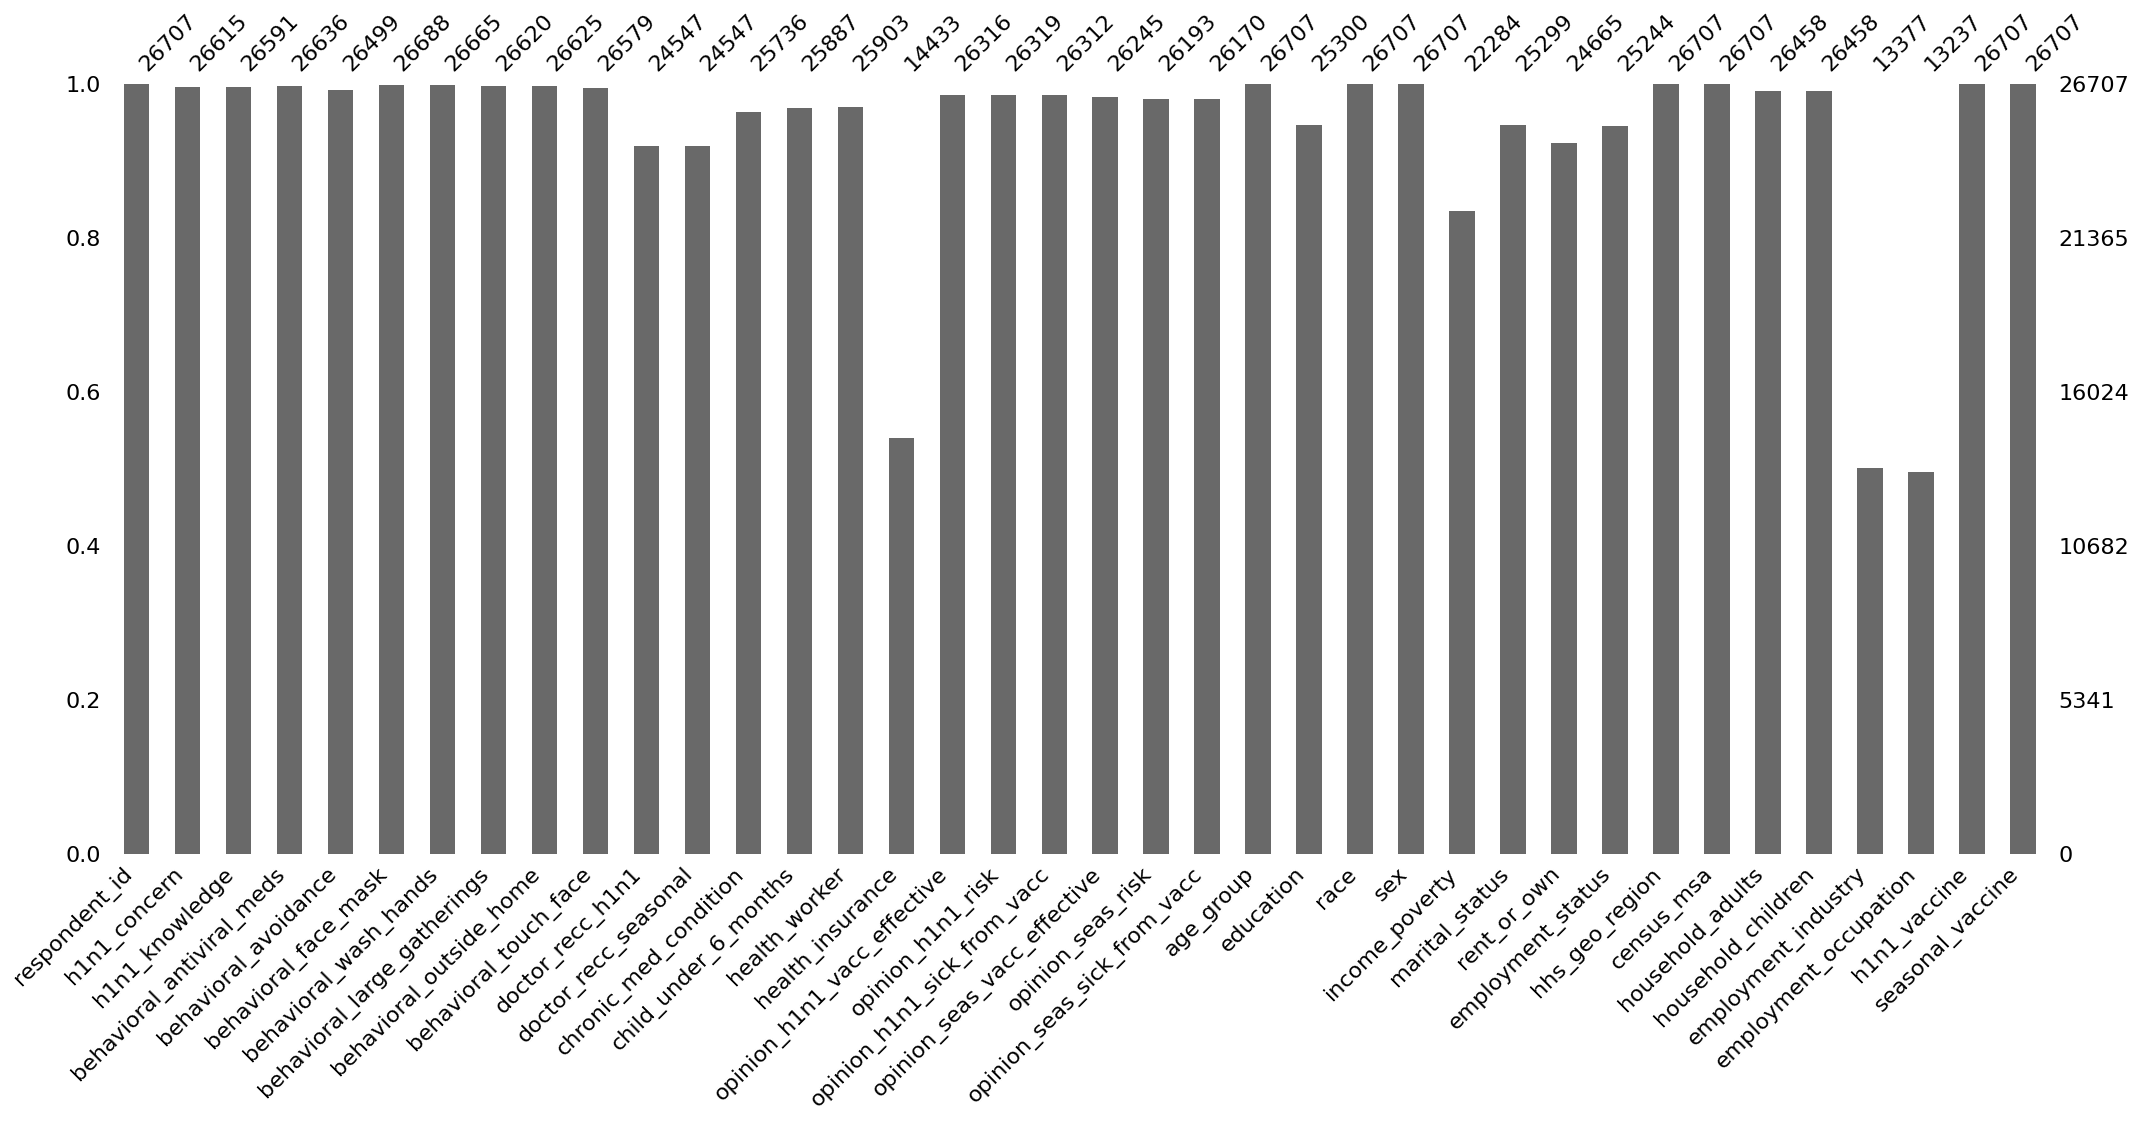

In [6]:
###################################
#         MISSING VALUES          #
###################################
print(flu_df.isnull().values.any())
print(flu_df.isnull().sum())

msno.bar(flu_df)
plt.show()


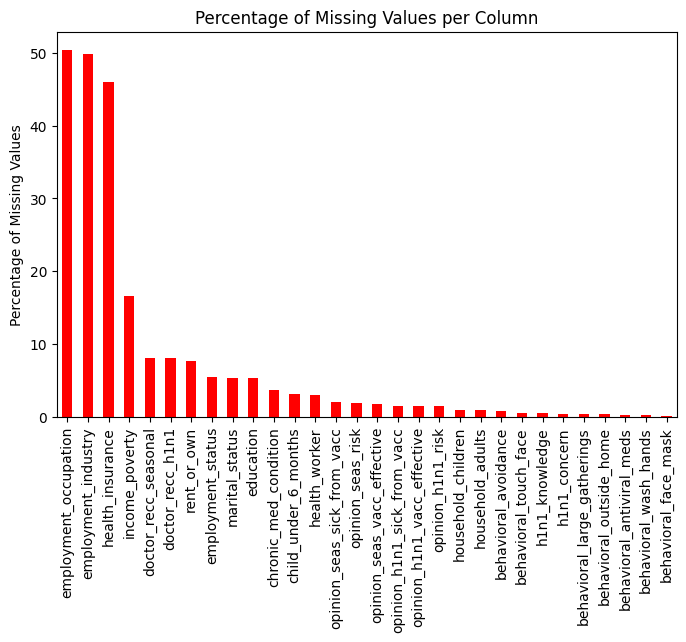

In [7]:
missing_values = (flu_df.isnull().sum() / len(flu_df)) * 100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing_values.plot(kind='bar', color='red')
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")
plt.show()


In [ ]:
##################################################
# T1.1.3. SUMMARY STATS FOR FEATURES             #
##################################################
flu_df = flu_df.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1, errors='ignore')
flu_df['education'].value_counts(dropna=False)

cat_cols = flu_df.select_dtypes(include=['object', 'category']).columns
num_cols = flu_df.select_dtypes(include=['int64', 'float64']).columns

numeric_sum = flu_df[num_cols].describe().T
print("Summary statistics for numerical features:")
display(numeric_sum)

Summary statistics for numerical features:


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [ ]:
categorical_sum = flu_df[cat_cols].describe().T
print("\nSummary statistics for categorical features:")
display(categorical_sum)


Summary statistics for categorical features:


,count,unique,top,freq
age_group,26707,5,65+ Years,6843
education,25300,4,College Graduate,10097
race,26707,4,White,21222
sex,26707,2,Female,15858
income_poverty,22284,3,"<= $75,000, Above Poverty",12777
marital_status,25299,2,Married,13555
rent_or_own,24665,2,Own,18736
employment_status,25244,3,Employed,13560
hhs_geo_region,26707,10,lzgpxyit,4297
census_msa,26707,3,"MSA, Not Principle City",11645


In [ ]:
##################################################
#    VARIABLE DISTRIBUTIONS AND CLASS BALANCE    #
##################################################

print(flu_df['h1n1_vaccine'].value_counts(normalize=True) * 100)
h1n1_dist = flu_df['h1n1_vaccine'].value_counts().reset_index()
h1n1_dist.columns = ['Class', 'Count']
h1n1_dist['Percentage'] = (h1n1_dist['Count'] / h1n1_dist['Count'].sum()) * 100
print(h1n1_dist)


h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64
   Class  Count  Percentage
0      0  21033   78.754634
1      1   5674   21.245366


In [ ]:
print(flu_df['seasonal_vaccine'].value_counts(normalize=True) * 100)
seaonal_dist = flu_df['seasonal_vaccine'].value_counts().reset_index()
seaonal_dist.columns = ['Class', 'Count']
seaonal_dist['Percentage'] = (seaonal_dist['Count'] / seaonal_dist['Count'].sum()) * 100
print(seaonal_dist)

seasonal_vaccine
0    53.439173
1    46.560827
Name: proportion, dtype: float64
   Class  Count  Percentage
0      0  14272   53.439173
1      1  12435   46.560827


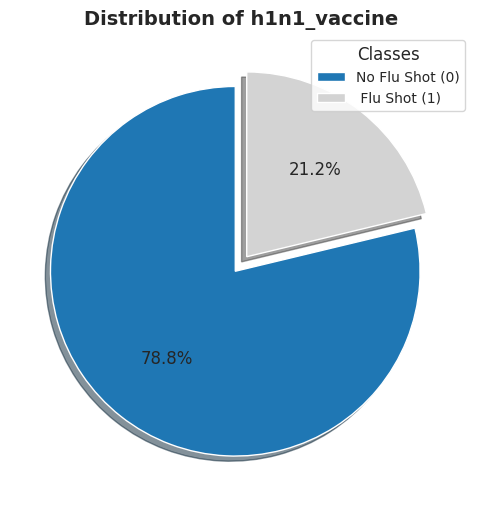

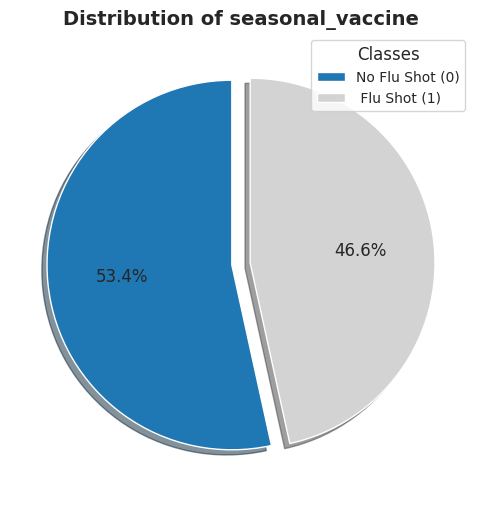

In [ ]:
targets = ['h1n1_vaccine', 'seasonal_vaccine']

colors = ['#1f77b4', '#d3d3d3']
for col in targets:
    counts = flu_df[col].value_counts()

    counts = counts.sort_index()

    labels = ['No Flu Shot (0)', ' Flu Shot (1)']
    explode = [0.05] * len(counts)

    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(
        counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],
        explode=explode,
        shadow=True
    )

    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.legend(wedges, labels, title="Classes", loc="upper right", fontsize=10)
    plt.show()

In [8]:
#############################################
#Task 1.2: Data Cleaning and Preprocessing. #
#############################################

#Ticket 1.2.1: Handle missing values
cat_cols = flu_df.select_dtypes(include=['object', 'category']).columns
num_cols = flu_df.select_dtypes(include=['int64', 'float64']).columns.drop('respondent_id', errors='ignore')
imputation_cols = num_cols.tolist() + cat_cols.tolist()
# 1. Implement Imputation Strategies
# Numeric (int/float): Median imputation is applied to ALL numerical/binary columns for consistency
num_imputer = SimpleImputer(strategy="median")
flu_df[num_cols] = num_imputer.fit_transform(flu_df[num_cols])

# Categorical (object/category): Most frequent value (mode) is used
cat_imputer = SimpleImputer(strategy="most_frequent")
flu_df[cat_cols] = cat_imputer.fit_transform(flu_df[cat_cols])

# 2. Verification Code for Imputation
print("\nVerification of Imputation (Checking remaining NaNs):")
total_na_after_imputation = flu_df[imputation_cols].isnull().sum().sum()

if total_na_after_imputation == 0:
    print("SUCCESS: All missing values in numerical and categorical features have been imputed.")
else:
    print(f"ERROR: {total_na_after_imputation} missing values remaining after imputation.")


Verification of Imputation (Checking remaining NaNs):
SUCCESS: All missing values in numerical and categorical features have been imputed.


In [9]:
#To check for missing values
print(flu_df.isnull().values.any())
print(flu_df.isnull().sum())

False
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_

In [10]:
#Ticket 1.2.2: Convert categorical variables to appropriate formats
# 1. Define Ordinal Categories and Features
# Create reusable ordered mappings for OrdinalEncoder
ordinal_features = ['age_group', 'education', 'income_poverty']
age_group_order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
education_order = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
income_poverty_order = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
ordinal_categories = [age_group_order, education_order, income_poverty_order]

# 2. Define Nominal Features
all_cat_cols_imputed = flu_df.select_dtypes(include=['object', 'category']).columns
nominal_features = [col for col in all_cat_cols_imputed if col not in ordinal_features]

# 3. Create the binary_features
binary_features = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance']
scaling_features = [col for col in num_cols if col not in binary_features]
# 4. Create the ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        # Ordinal Encoding: For ordered features
        ('ord', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features),

        # One-Hot Encoding: For nominal features
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features),

        # Passthrough: Capped Numerical Features (for subsequent scaling)
        ('num_scale', 'passthrough', scaling_features),

        # Passthrough: Binary Features (includes all 'behavioral_' columns)
        ('binary_passthrough', 'passthrough', binary_features)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)
print("ColumnTransformer created for reusable encoding for Ordinal & One-Hot")

ColumnTransformer created for reusable encoding for Ordinal & One-Hot


In [ ]:
# Check for NaNs in the data
if flu_df.isna().any().any():
    print("\nThere are missing values in the data.")
else:
    print("\nNo missing values was found.")


No missing values was found.


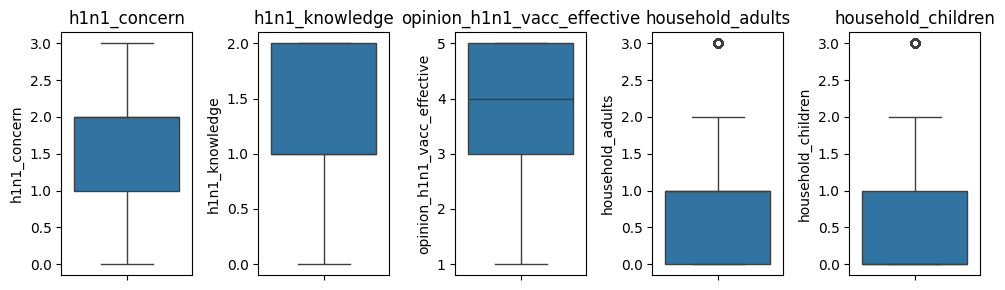

No significant outliers found for 'h1n1_concern'.
No significant outliers found for 'h1n1_knowledge'.
No significant outliers found for 'opinion_h1n1_vacc_effective'.
No significant outliers found for 'opinion_h1n1_risk'.
No significant outliers found for 'opinion_h1n1_sick_from_vacc'.
Capped 3427 outliers in 'opinion_seas_vacc_effective' (bounds: 2.50, 6.50).
No significant outliers found for 'opinion_seas_risk'.
Capped 6573 outliers in 'opinion_seas_sick_from_vacc' (bounds: -0.50, 3.50).
Capped 1125 outliers in 'household_adults' (bounds: -1.50, 2.50).
Capped 1747 outliers in 'household_children' (bounds: -1.50, 2.50).


In [ ]:
#Ticket 1.2.3: Visualize outliers
# Visualization: Use boxplots to visualize outliers in a few key numerical
viz_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'household_adults', 'household_children']

plt.figure(figsize=(10, 3))
for i, col in enumerate(viz_cols):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(y=flu_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Statistical Method: IQR rule (1.5 * IQR)
for col in scaling_features:
    if flu_df[col].nunique() <= 2:
        print(f"Skipping '{col}' — binary/categorical (unique values: {flu_df[col].unique()})")
        continue

    Q1 = flu_df[col].quantile(0.25)
    Q3 = flu_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((flu_df[col] < lower_bound) | (flu_df[col] > upper_bound)).sum()

    if outliers_count > 0:
        # Treatment Strategy: Capping (Winsorization)
        flu_df[col] = np.where(flu_df[col] < lower_bound, lower_bound, flu_df[col])
        flu_df[col] = np.where(flu_df[col] > upper_bound, upper_bound, flu_df[col])
        print(f"Capped {outliers_count} outliers in '{col}' (bounds: {lower_bound:.2f}, {upper_bound:.2f}).")
    else:
        print(f"No significant outliers found for '{col}'.")

In [11]:
#Ticket 1.2.4: Normalize/standardize numerical features if appropriate
scaler = StandardScaler()

In [12]:
# Ticket 1.2.5: Create a data cleaning pipeline that can be reused for test data

# The Pipeline combines encoding/passthrough (ColumnTransformer) with scaling (StandardScaler)
preprocessing_pipeline = Pipeline(steps=[
    ('encoder', column_transformer),
    ('scaler', scaler)
])
print("preprocessing_pipeline is created.")

preprocessing_pipeline is created.


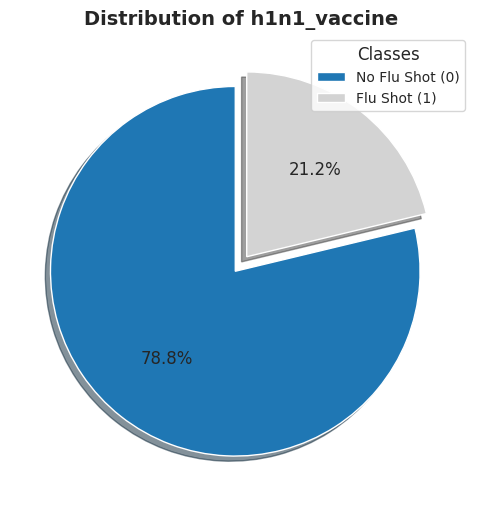

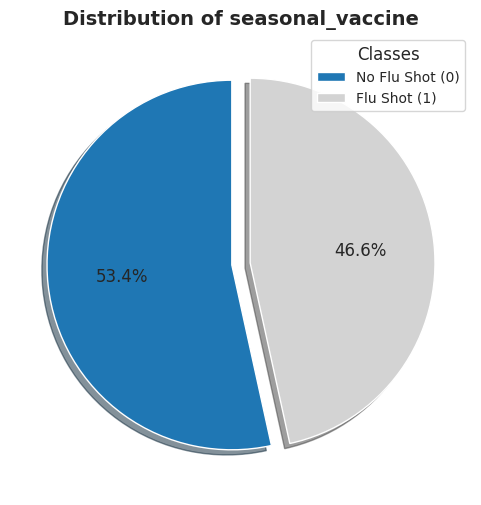

In [ ]:
########################################
# Ticket 1.3 Exploratory Visualization #
########################################

####################################
# 1.3.1 Vaccination rates          #
####################################

targets = ['h1n1_vaccine', 'seasonal_vaccine']
colors = ['#1f77b4', '#d3d3d3']

for col in targets:
    counts = flu_df[col].value_counts().sort_index()

    labels = ['No Flu Shot (0)', 'Flu Shot (1)']
    explode = [0.05] * len(counts)

    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],
        explode=explode,
        shadow=True
    )

    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.legend(wedges, labels, title="Classes", loc="upper right", fontsize=10)
    plt.show()


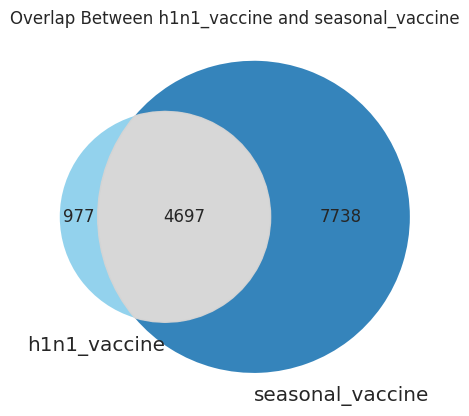

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

v1, v2 = targets
h1n1_only = ((flu_df[v1] == 1) & (flu_df[v2] == 0)).sum()
seasonal_only = ((flu_df[v2] == 1) & (flu_df[v1] == 0)).sum()
both = ((flu_df[v1] == 1) & (flu_df[v2] == 1)).sum()

v = venn2(
    subsets=(h1n1_only, seasonal_only, both),
    set_labels=(v1, v2),
    set_colors=("skyblue", '#1f77b4'),
    alpha=0.9
)

overlap_patch = v.get_patch_by_id('11')
if overlap_patch is not None:
    overlap_patch.set_color('lightgrey')

plt.title(f'Overlap Between {v1} and {v2}')
plt.show()

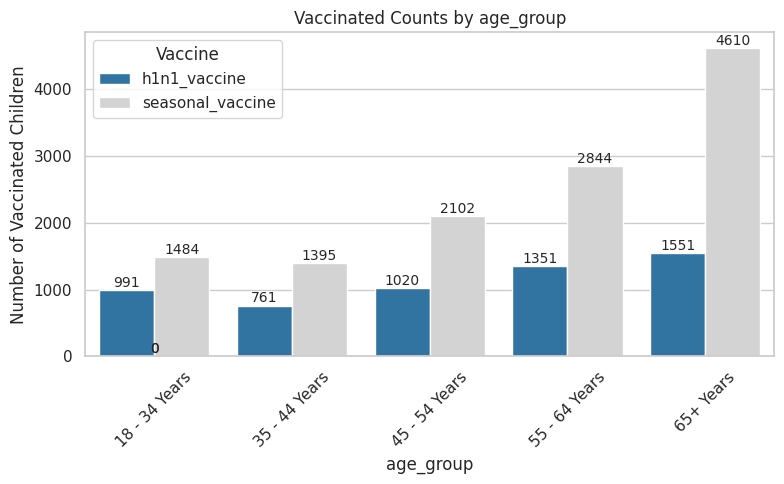

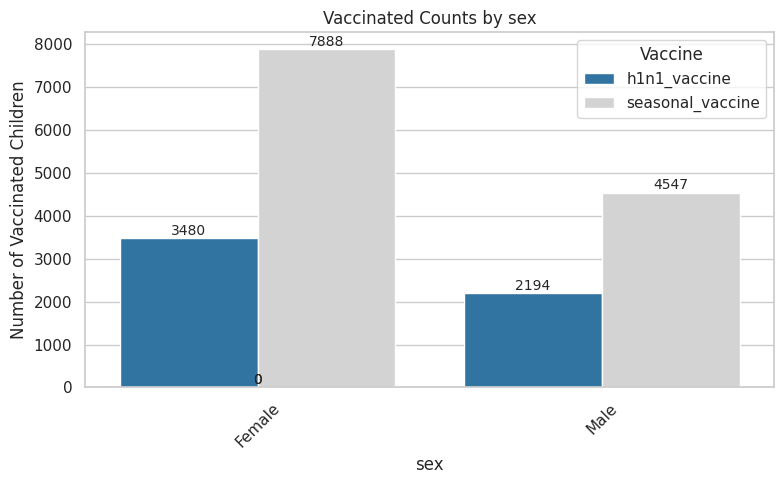

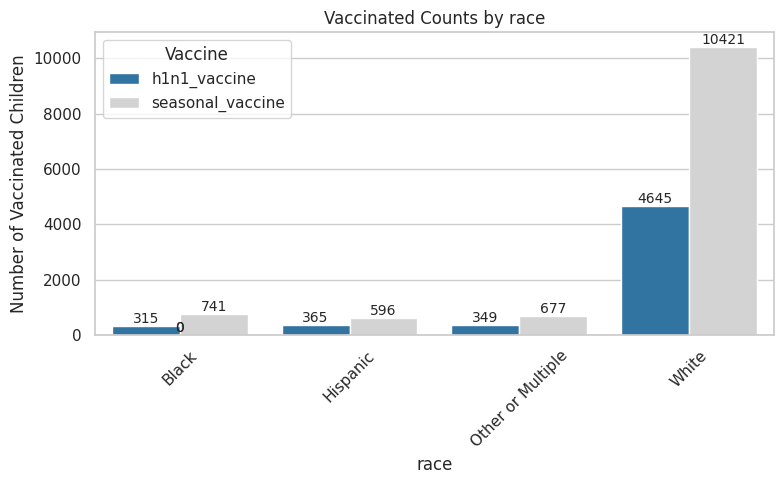

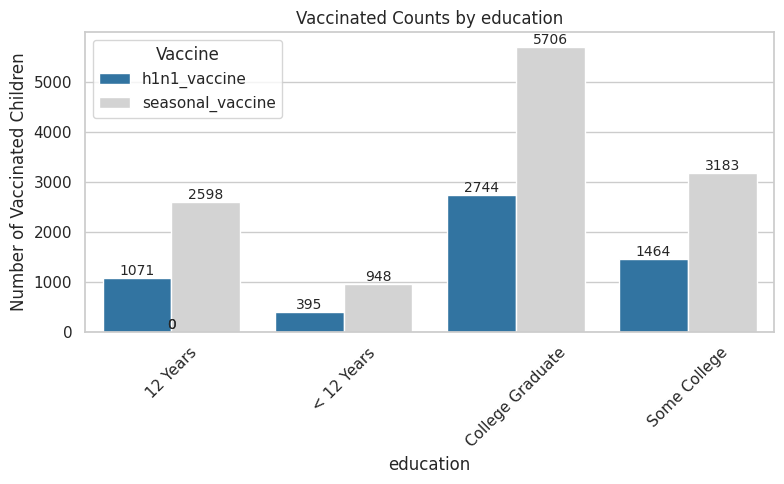

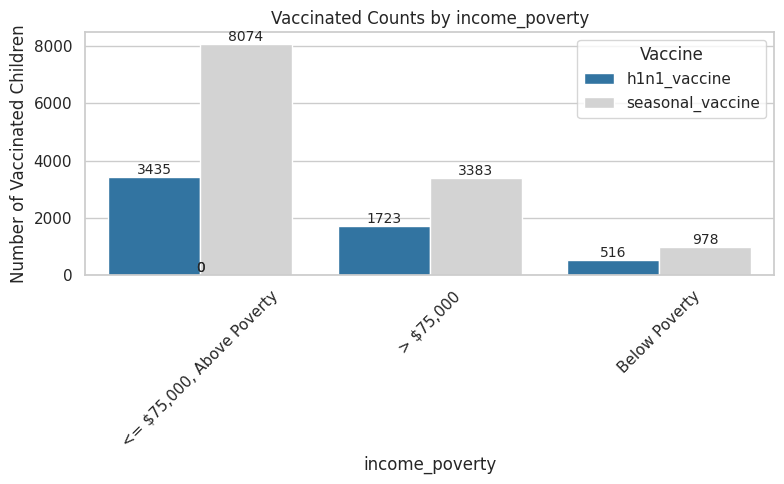

In [ ]:
####################################
# 1.3.2 Deographics.               #
####################################
demographics = ['age_group', 'sex', 'race', 'education','income_poverty']
for col in demographics:
    flu_df[col] = flu_df[col].astype('category')

demo_df = flu_df.melt(
    id_vars=demographics,
    value_vars=targets,
    var_name='Vaccine',
    value_name='Vaccinated'
)

demo_df_vaccinated = demo_df[demo_df['Vaccinated'] == 1]

for demo in demographics:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(
        data=demo_df_vaccinated,
        x=demo,
        hue='Vaccine',
        palette=['#1f77b4', '#d3d3d3']
    )
    plt.ylabel('Number of Vaccinated Children')
    plt.title(f'Vaccinated Counts by {demo}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width()/2,
            y=height + 0.5,
            s=int(height),
            ha='center',
            va='bottom',
            fontsize=10
        )

    plt.legend(title='Vaccine')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ct = pd.pivot_table(
/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ct = pd.pivot_table(
/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ct = pd.pivot_table(
/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence 

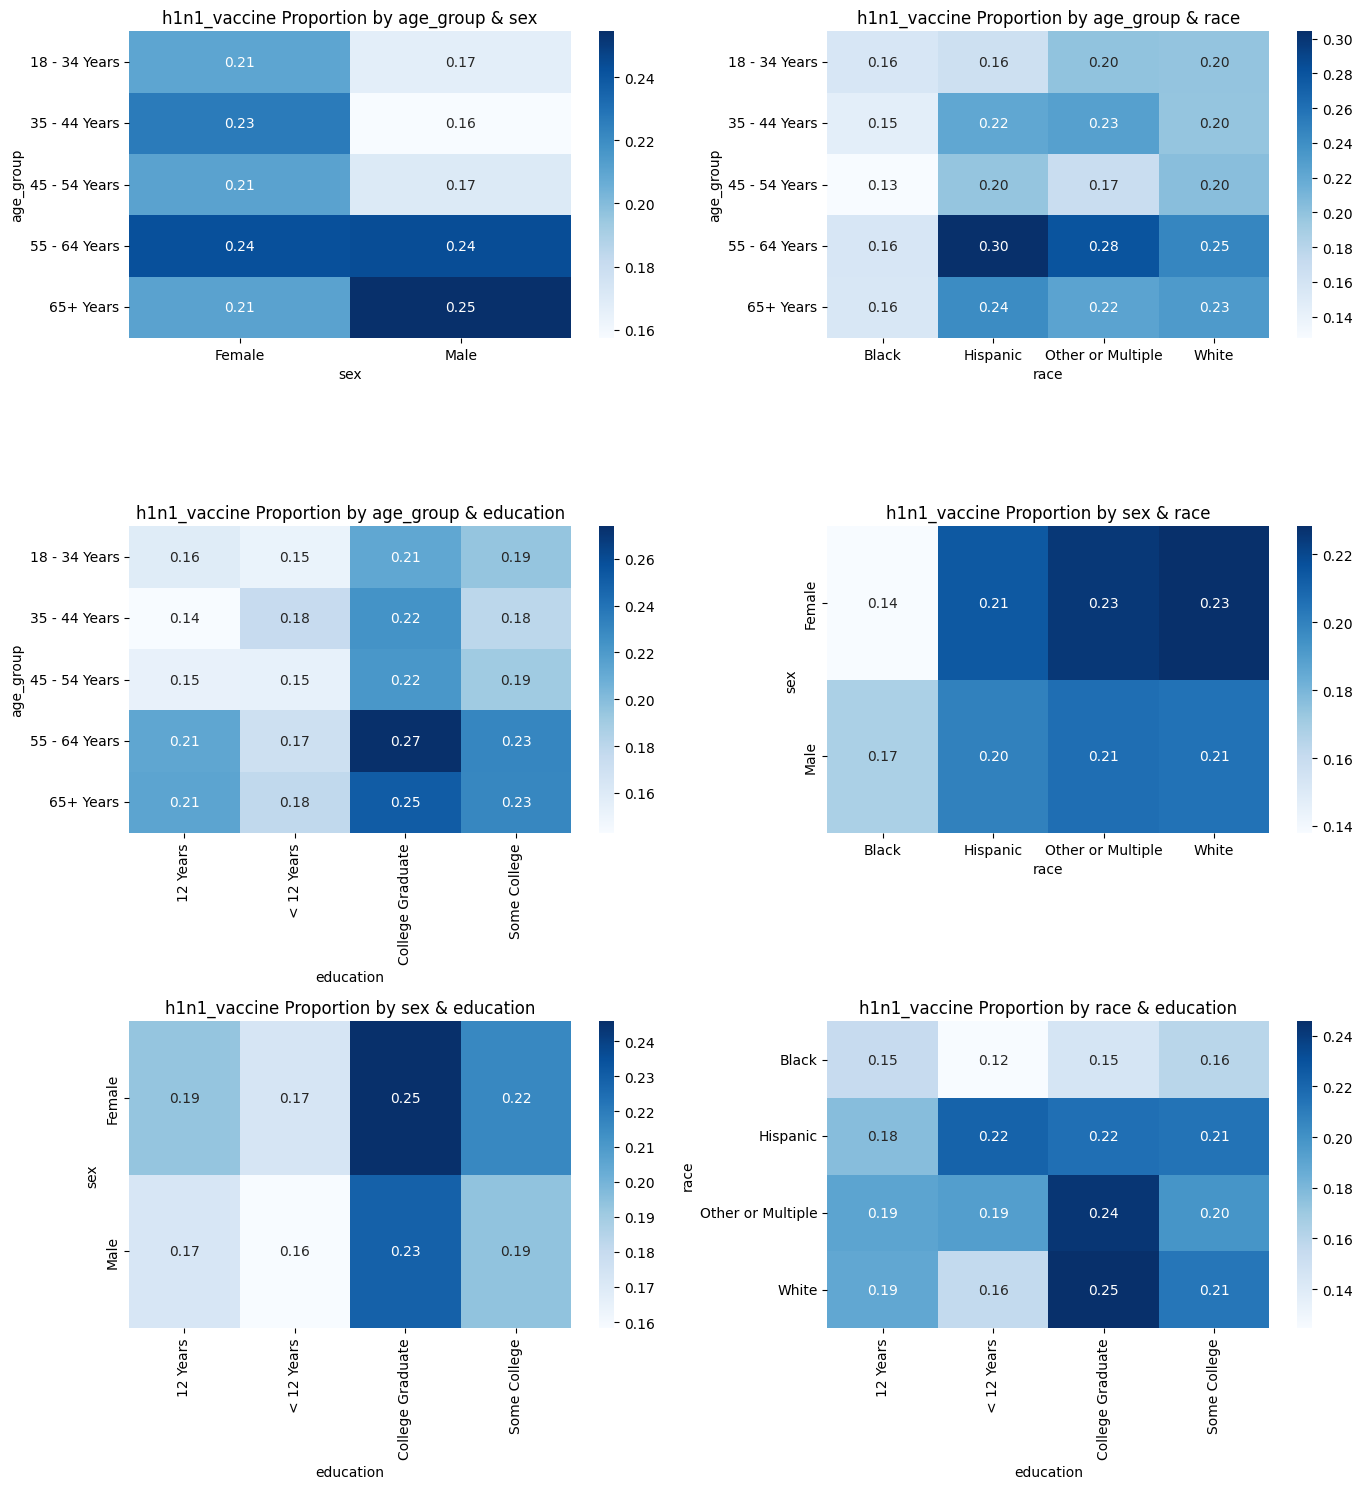

/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ct = pd.pivot_table(
/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ct = pd.pivot_table(
/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ct = pd.pivot_table(
/tmp/ipython-input-906204158.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence 

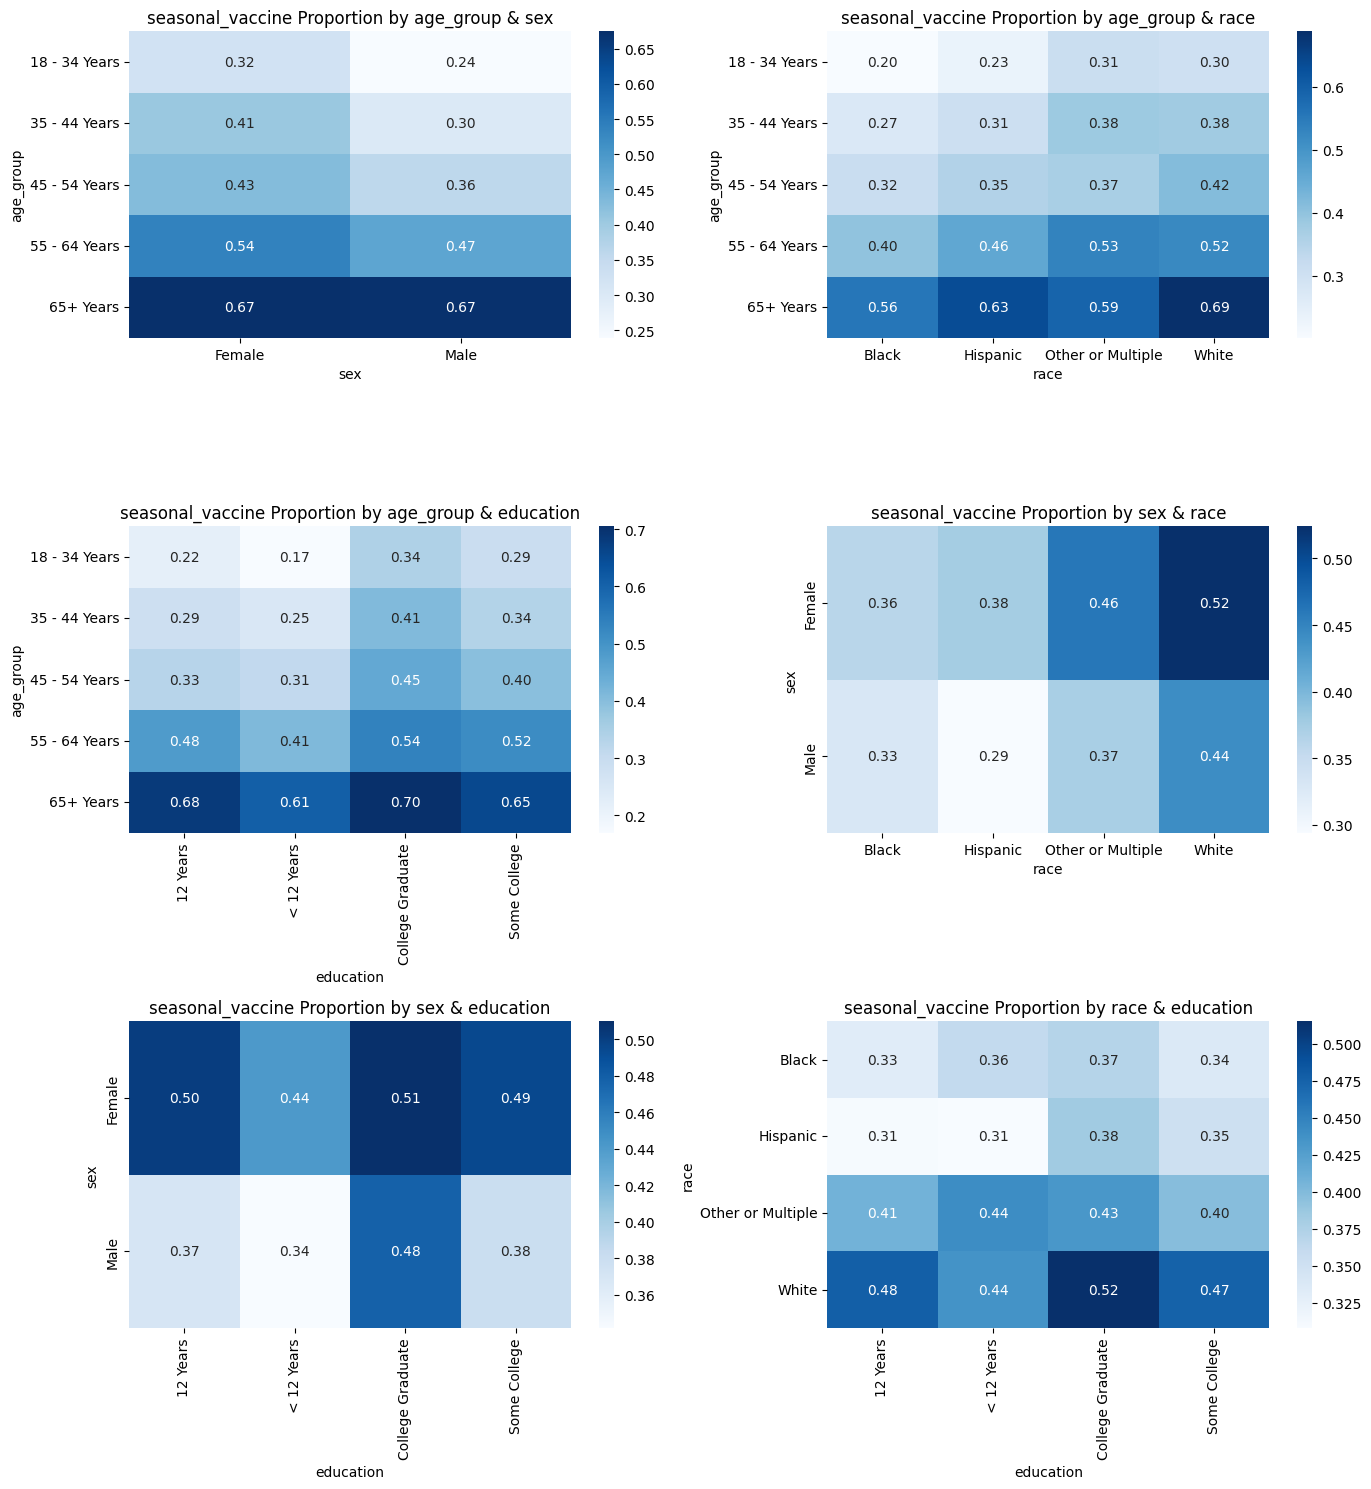

In [ ]:
demographics = ['age_group', 'sex', 'race', 'education']
for col in demographics:
    flu_df[col] = flu_df[col].astype('category')

demo_pairs = list(itertools.combinations(demographics, 2))

for vaccine in targets:
    n_rows = len(demo_pairs) // 2 + len(demo_pairs) % 2
    n_cols = 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))

    axes = axes.flatten()

    for i, (demo1, demo2) in enumerate(demo_pairs):
        ct = pd.pivot_table(
            flu_df,
            values=vaccine,
            index=demo1,
            columns=demo2,
            aggfunc='mean',
            fill_value=0
        )
        sns.heatmap(ct, annot=True, fmt=".2f", cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{vaccine} Proportion by {demo1} & {demo2}')
        axes[i].set_ylabel(demo1)
        axes[i].set_xlabel(demo2)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
!pip install kmodes



In [ ]:
demo_cols = ['sex', 'age_group', 'education', 'income_poverty', 'race']

demo_data = flu_df[demo_cols].dropna().astype(str)
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, random_state=42)
clusters = kmodes.fit_predict(demo_data)
flu_df.loc[demo_data.index, 'Cluster'] = clusters

cluster_summary = flu_df.groupby('Cluster')[demo_cols].agg(lambda x: x.value_counts().index[0])
print("\nCluster Profiles:")
print(cluster_summary)



Cluster Profiles:
            sex      age_group         education             income_poverty  \
Cluster                                                                       
0.0      Female      65+ Years  College Graduate  <= $75,000, Above Poverty   
1.0        Male  18 - 34 Years      Some College  <= $75,000, Above Poverty   
2.0        Male  45 - 54 Years  College Graduate  <= $75,000, Above Poverty   

          race  
Cluster         
0.0      White  
1.0      White  
2.0      White  


In [ ]:
vaccine_rates = (
    flu_df.groupby('Cluster')[['h1n1_vaccine', 'seasonal_vaccine']]
    .mean()
    .reset_index()
    .melt(id_vars='Cluster', var_name='Vaccine', value_name='Rate')
)

vaccine_rates['Rate'] *= 100

In [ ]:
vaccinated_df = flu_df[(flu_df['h1n1_vaccine'] == 1) | (flu_df['seasonal_vaccine'] == 1)].copy()

print(vaccinated_df.shape)


(13412, 36)


In [ ]:
demo_cols = ['sex', 'age_group', 'education', 'income_poverty', 'race']
demo_data = vaccinated_df[demo_cols].dropna().astype(str)


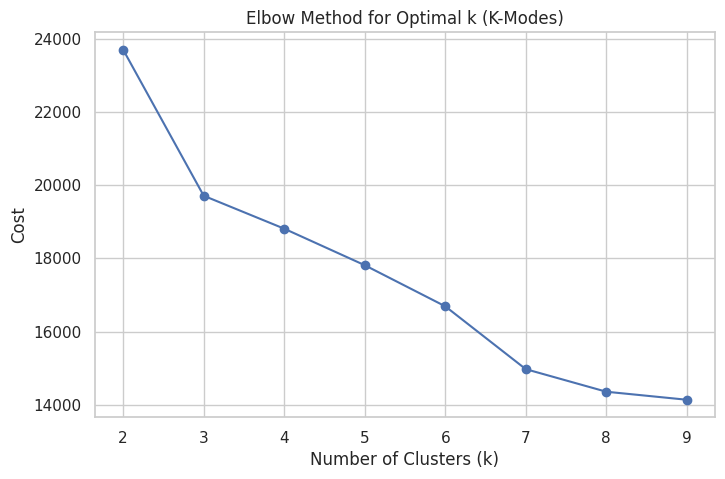

In [ ]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

cost = []
K = range(2, 10)

for k in K:
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, random_state=42)
    kmodes.fit_predict(demo_data)
    cost.append(kmodes.cost_)

plt.figure(figsize=(8,5))
plt.plot(K, cost, marker='o')
plt.title('Elbow Method for Optimal k (K-Modes)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


In [ ]:
optimal_k = 3
kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=5, random_state=42)
clusters = kmodes.fit_predict(demo_data)

vaccinated_df['Cluster'] = clusters


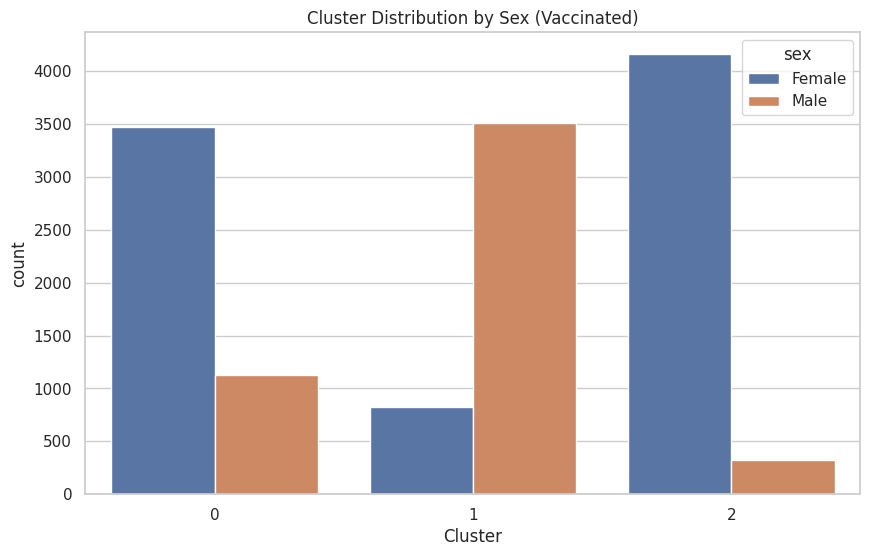

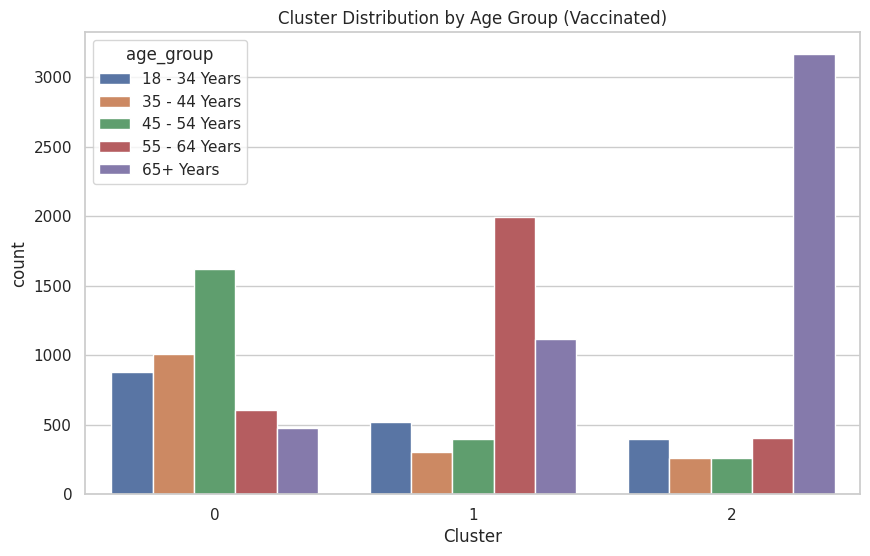

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=vaccinated_df, x='Cluster', hue='sex')
plt.title('Cluster Distribution by Sex (Vaccinated)')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=vaccinated_df, x='Cluster', hue='age_group')
plt.title('Cluster Distribution by Age Group (Vaccinated)')
plt.show()


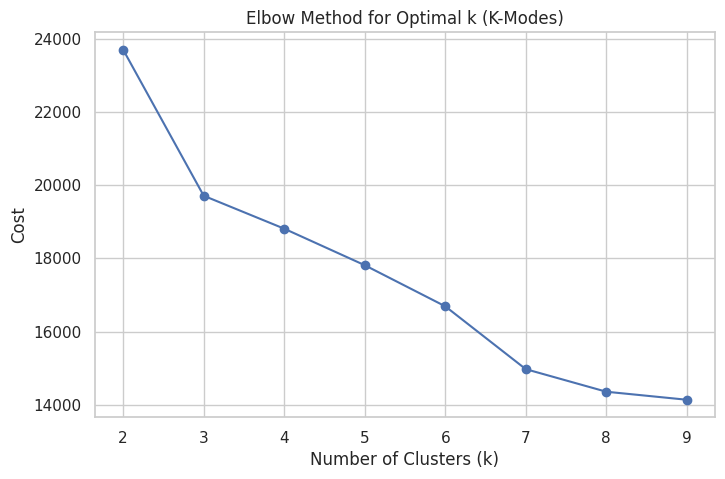

            sex      age_group         education             income_poverty  \
Cluster                                                                       
0        Female  45 - 54 Years  College Graduate                  > $75,000   
1          Male  55 - 64 Years  College Graduate  <= $75,000, Above Poverty   
2        Female      65+ Years      Some College  <= $75,000, Above Poverty   

          race  
Cluster         
0        White  
1        White  
2        White  


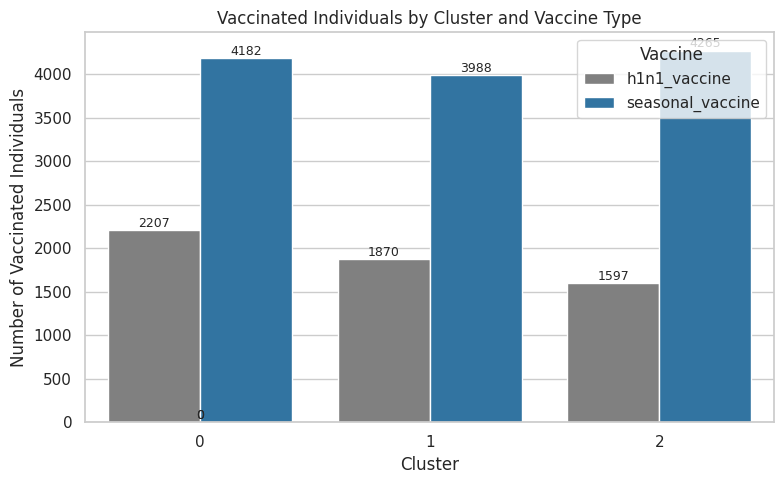

In [ ]:
vaccinated_df = flu_df[(flu_df['h1n1_vaccine'] == 1) | (flu_df['seasonal_vaccine'] == 1)].copy()

demo_cols = ['sex', 'age_group', 'education', 'income_poverty', 'race']
demo_data = vaccinated_df[demo_cols].astype(str)

cost = []
K = range(2, 10)
for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, random_state=42)
    km.fit_predict(demo_data)
    cost.append(km.cost_)

plt.figure(figsize=(8,5))
plt.plot(K, cost, marker='o')
plt.title('Elbow Method for Optimal k (K-Modes)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

optimal_k = 3
kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=5, random_state=42)
clusters = kmodes.fit_predict(demo_data)

vaccinated_df['Cluster'] = clusters

cluster_profiles = vaccinated_df.groupby('Cluster')[demo_cols]\
    .agg(lambda x: x.value_counts().index[0])
print(cluster_profiles)

count_df = vaccinated_df.melt(
    id_vars=['Cluster'],
    value_vars=['h1n1_vaccine', 'seasonal_vaccine'],
    var_name='Vaccine',
    value_name='Status'
)

count_df = count_df[count_df['Status'] == 1]
cluster_counts = count_df.groupby(['Cluster', 'Vaccine']).size().reset_index(name='Count')

plt.figure(figsize=(8,5))
ax = sns.barplot(data=cluster_counts, x='Cluster', y='Count', hue='Vaccine', palette=['grey','#1f77b4'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 5, f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.ylabel('Number of Vaccinated Individuals')
plt.title('Vaccinated Individuals by Cluster and Vaccine Type')
plt.legend(title='Vaccine', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
cluster_profiles

,sex,age_group,education,income_poverty,race
Cluster,,,,,
0,Female,45 - 54 Years,College Graduate,"> $75,000",White
1,Male,55 - 64 Years,College Graduate,"<= $75,000, Above Poverty",White
2,Female,65+ Years,Some College,"<= $75,000, Above Poverty",White


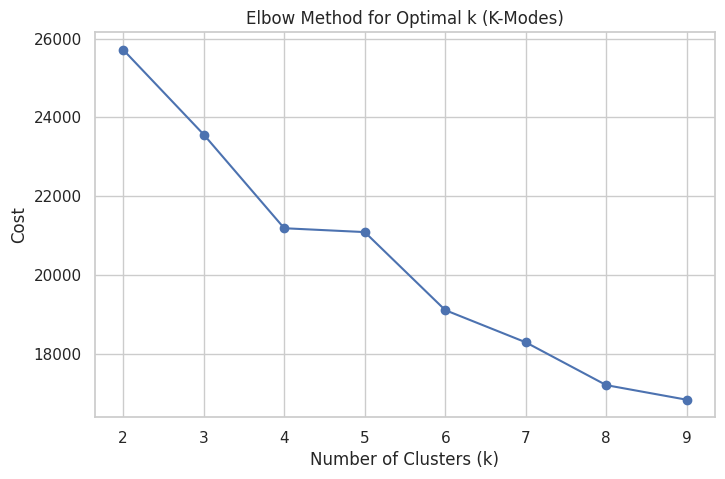

            sex      age_group         education             income_poverty  \
Cluster                                                                       
0        Female  18 - 34 Years  College Graduate  <= $75,000, Above Poverty   
1          Male  18 - 34 Years      Some College  <= $75,000, Above Poverty   
2          Male  55 - 64 Years  College Graduate                  > $75,000   
3        Female      65+ Years      Some College  <= $75,000, Above Poverty   

          race  
Cluster         
0        White  
1        White  
2        White  
3        White  


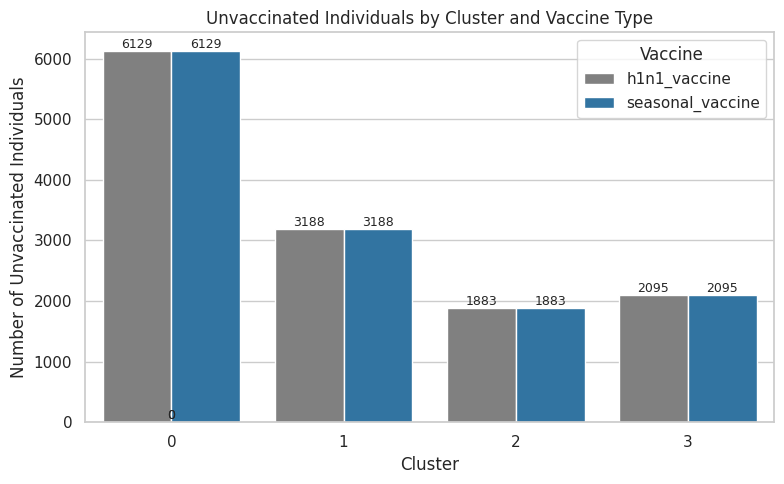

In [ ]:
unvac_df = flu_df[(flu_df['h1n1_vaccine'] == 0) & (flu_df['seasonal_vaccine'] == 0)].copy()

demo_cols = ['sex', 'age_group', 'education', 'income_poverty', 'race']
demo_data_unvac = unvac_df[demo_cols].astype(str)

cost = []
K = range(2, 10)
for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, random_state=42)
    km.fit_predict(demo_data_unvac)
    cost.append(km.cost_)

plt.figure(figsize=(8,5))
plt.plot(K, cost, marker='o')
plt.title('Elbow Method for Optimal k (K-Modes)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

optimal_k = 4
kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=5, random_state=42)
clusters_unvac = kmodes.fit_predict(demo_data_unvac)

unvac_df['Cluster'] = clusters_unvac

cluster_profiles_unvac = unvac_df.groupby('Cluster')[demo_cols]\
    .agg(lambda x: x.value_counts().index[0])
print(cluster_profiles_unvac)

count_df = unvac_df.melt(
    id_vars=['Cluster'],
    value_vars=['h1n1_vaccine', 'seasonal_vaccine'],
    var_name='Vaccine',
    value_name='Status'
)

count_df = count_df[count_df['Status'] == 0]
cluster_counts = count_df.groupby(['Cluster', 'Vaccine']).size().reset_index(name='Count')

plt.figure(figsize=(8,5))
ax = sns.barplot(data=cluster_counts, x='Cluster', y='Count', hue='Vaccine', palette=['grey','#1f77b4'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 5, f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.ylabel('Number of Unvaccinated Individuals')
plt.title('Unvaccinated Individuals by Cluster and Vaccine Type')
plt.legend(title='Vaccine', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
cluster_summary_unvac


,sex,age_group,education,income_poverty,race
Cluster,,,,,
0,Female,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",White
1,Male,18 - 34 Years,Some College,"<= $75,000, Above Poverty",White
2,Male,55 - 64 Years,College Graduate,"> $75,000",White
3,Female,65+ Years,Some College,"<= $75,000, Above Poverty",White


In [ ]:
for col in demo_cols:
    contingency_table = pd.crosstab(vaccinated_df[col], vaccinated_df['Cluster'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Variable: {col}")
    print("Chi2:", round(chi2,2), "| p-value:", round(p,10))
    if p < 0.05:
        print("=> Significant difference between clusters\n")
    else:
        print("=> No significant difference between clusters\n")


Variable: sex
Chi2: 5616.26 | p-value: 0.0
=> Significant difference between clusters

Variable: age_group
Chi2: 6310.74 | p-value: 0.0
=> Significant difference between clusters

Variable: education
Chi2: 3283.96 | p-value: 0.0
=> Significant difference between clusters

Variable: income_poverty
Chi2: 6209.04 | p-value: 0.0
=> Significant difference between clusters

Variable: race
Chi2: 38.52 | p-value: 8.869e-07
=> Significant difference between clusters



In [ ]:
#####################################
#1.3.3 Corr of behaviour & opinions #
#####################################
flu_df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'Cluster'],
      dtype='object')

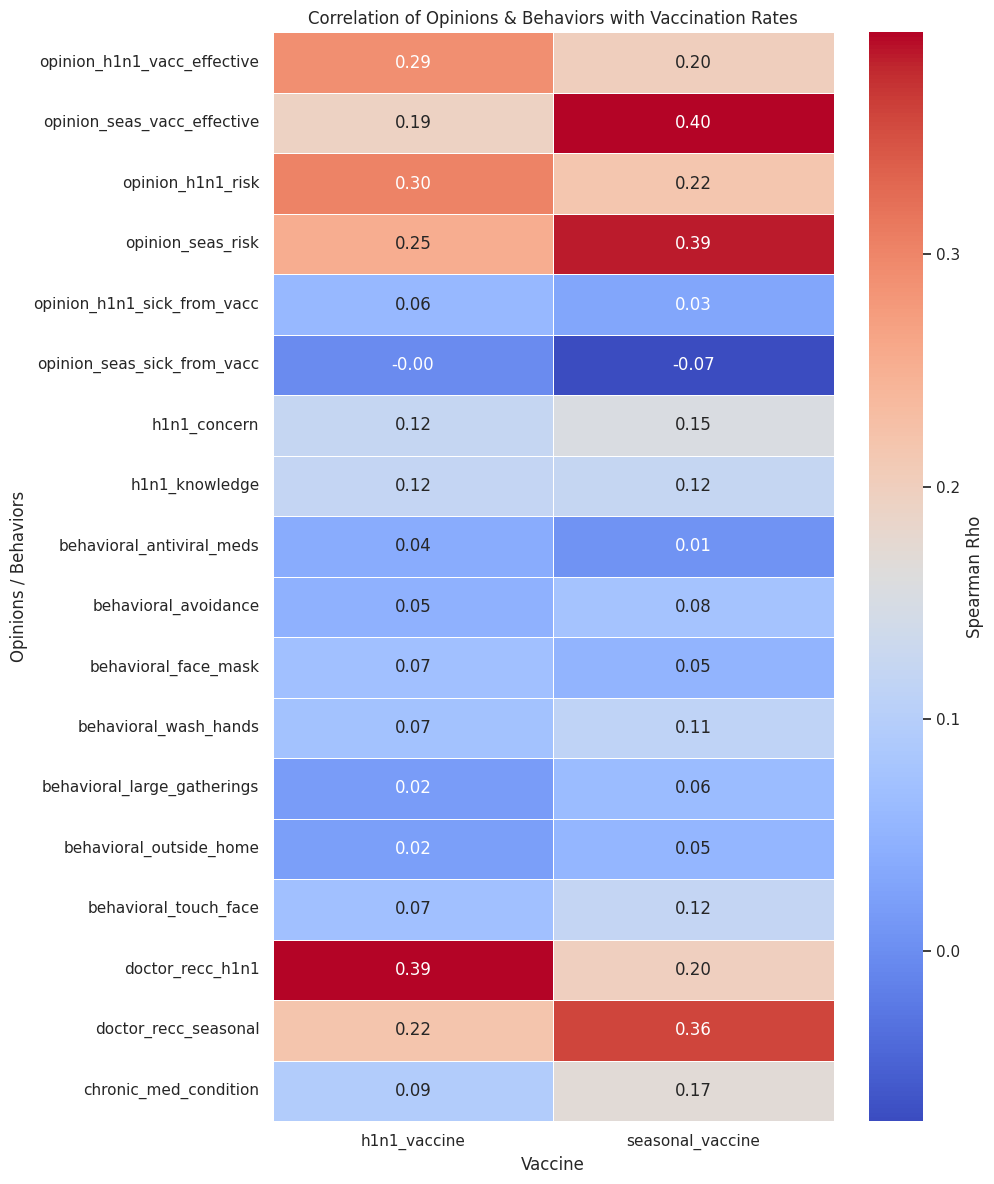

In [ ]:
opinion_cols = [
    'opinion_h1n1_vacc_effective', 'opinion_seas_vacc_effective',
    'opinion_h1n1_risk', 'opinion_seas_risk',
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc',
    'h1n1_concern', 'h1n1_knowledge'
]

behavioral_cols = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition'
]

vaccine_cols = ['h1n1_vaccine', 'seasonal_vaccine']

cols = opinion_cols + behavioral_cols + vaccine_cols

df_subset = flu_df[cols]

corr_matrix = df_subset.corr(method='spearman')

corr_with_vaccines = corr_matrix.loc[opinion_cols + behavioral_cols, vaccine_cols]

plt.figure(figsize=(10,12))
sns.heatmap(
    corr_with_vaccines,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Spearman Rho'}
)
plt.title('Correlation of Opinions & Behaviors with Vaccination Rates')
plt.ylabel('Opinions / Behaviors')
plt.xlabel('Vaccine')
plt.tight_layout()
plt.show()


In [ ]:
opinion_cols = [
    'opinion_h1n1_vacc_effective', 'opinion_seas_vacc_effective',
    'opinion_h1n1_risk', 'opinion_seas_risk',
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc',
    'h1n1_concern', 'h1n1_knowledge'
]

behavioral_cols = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition'
]

vaccine_cols = ['h1n1_vaccine', 'seasonal_vaccine']

rate_list = []
for factor in opinion_cols + behavioral_cols:
    for vac in vaccine_cols:
        counts = flu_df.groupby(factor)[vac].value_counts(normalize=True).rename('proportion').reset_index()
        counts['Factor'] = factor
        counts['Vaccine'] = vac
        counts['Status'] = counts[vac].map({0:'Not Vaccinated',1:'Vaccinated'})
        rate_list.append(counts[['Factor','Vaccine','Status','proportion']])

rate_df = pd.concat(rate_list, ignore_index=True)
rate_df['Percentage'] = rate_df['proportion'] * 100


In [ ]:
rate_opinion_df = rate_df[rate_df['Factor'].isin(opinion_cols)]
rate_behavior_df = rate_df[rate_df['Factor'].isin(behavioral_cols)]


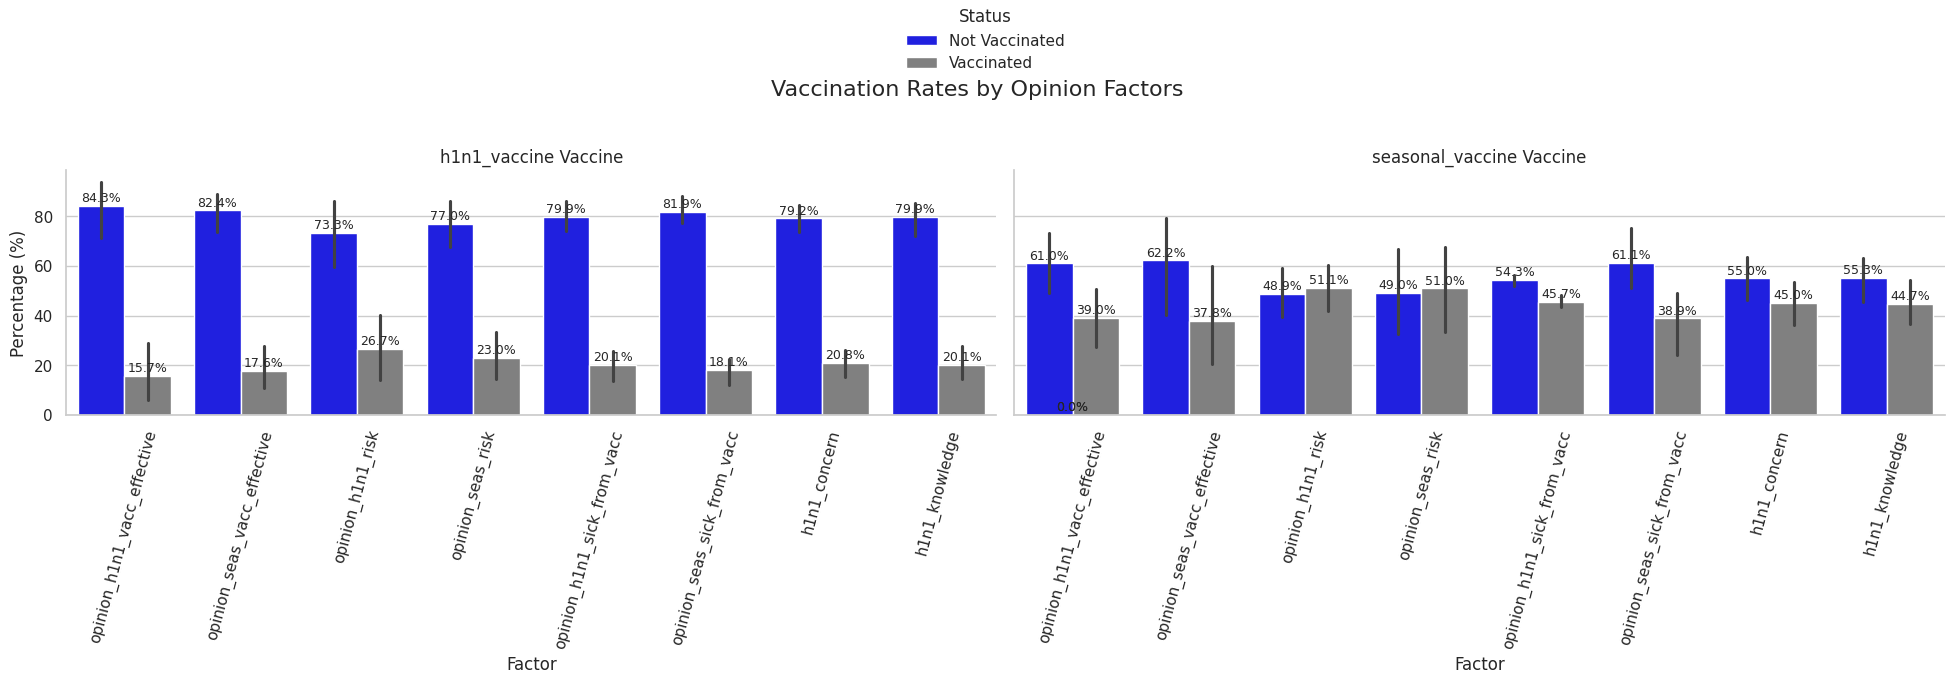

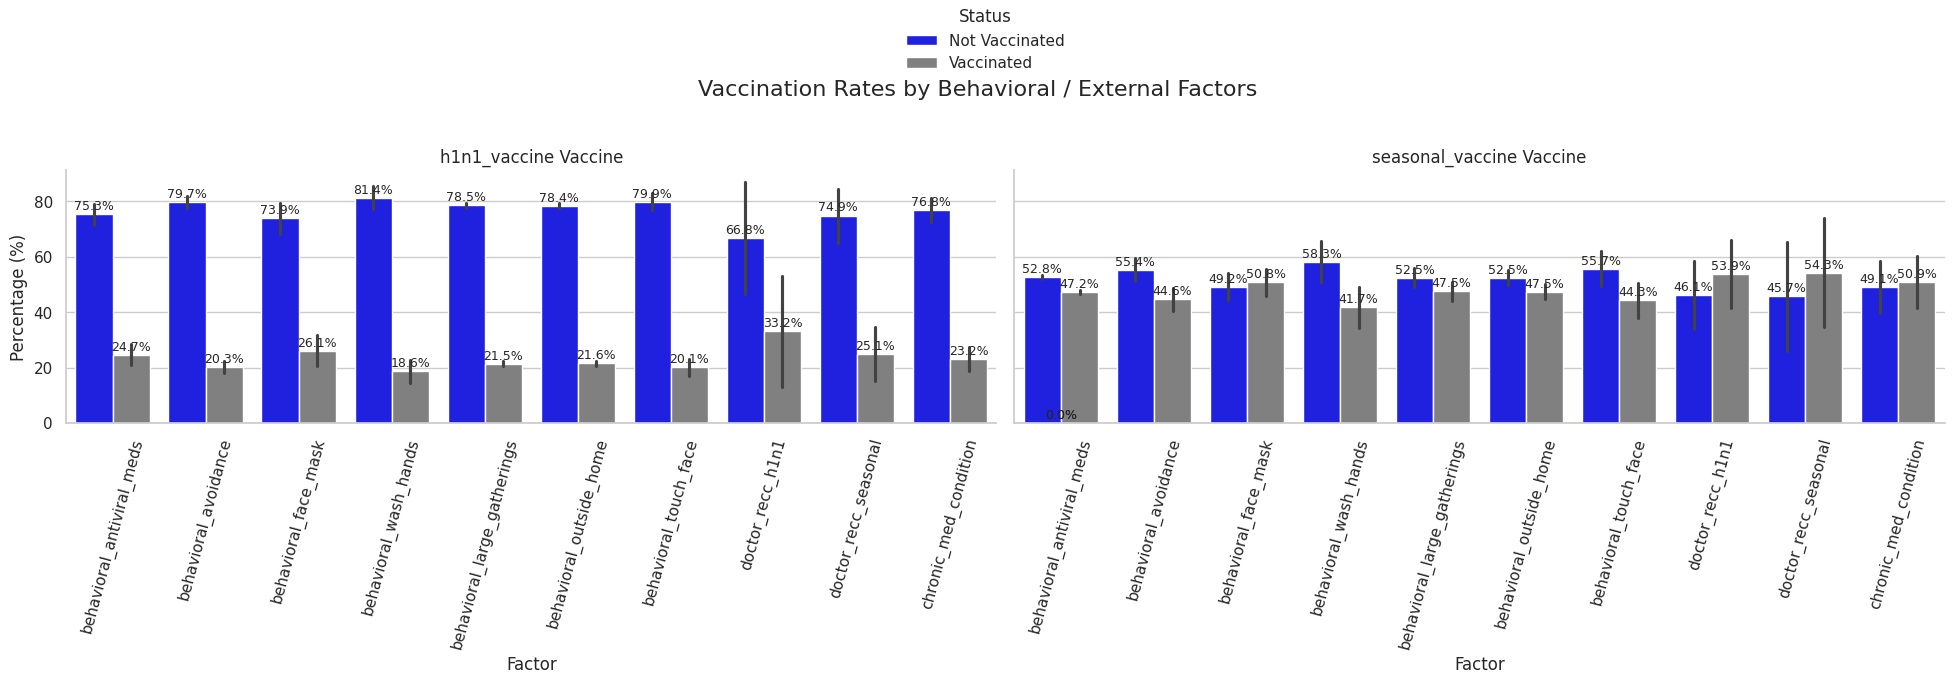

In [ ]:

def plot_vaccination_by_factor(df, title):
    g = sns.catplot(
        data=df,
        x='Factor',
        y='Percentage',
        hue='Status',
        col='Vaccine',
        kind='bar',
        palette={'Vaccinated':'grey','Not Vaccinated':'blue'},
        height=6,
        aspect=1.5
    )

    g.set_xticklabels(rotation=75)
    g.set_axis_labels("Factor", "Percentage (%)")
    g.set_titles("{col_name} Vaccine")
    g._legend.set_title('Status')
    g._legend.set_bbox_to_anchor((0.5, 1.15))
    g._legend.set_frame_on(False)
    g._legend.set_loc('upper center')

    for ax in g.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.text(
                x=p.get_x() + p.get_width()/2,
                y=height + 0.5,
                s=f"{height:.1f}%",
                ha='center',
                va='bottom',
                fontsize=9
            )
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_vaccination_by_factor(rate_opinion_df, "Vaccination Rates by Opinion Factors")
plot_vaccination_by_factor(rate_behavior_df, "Vaccination Rates by Behavioral / External Factors")


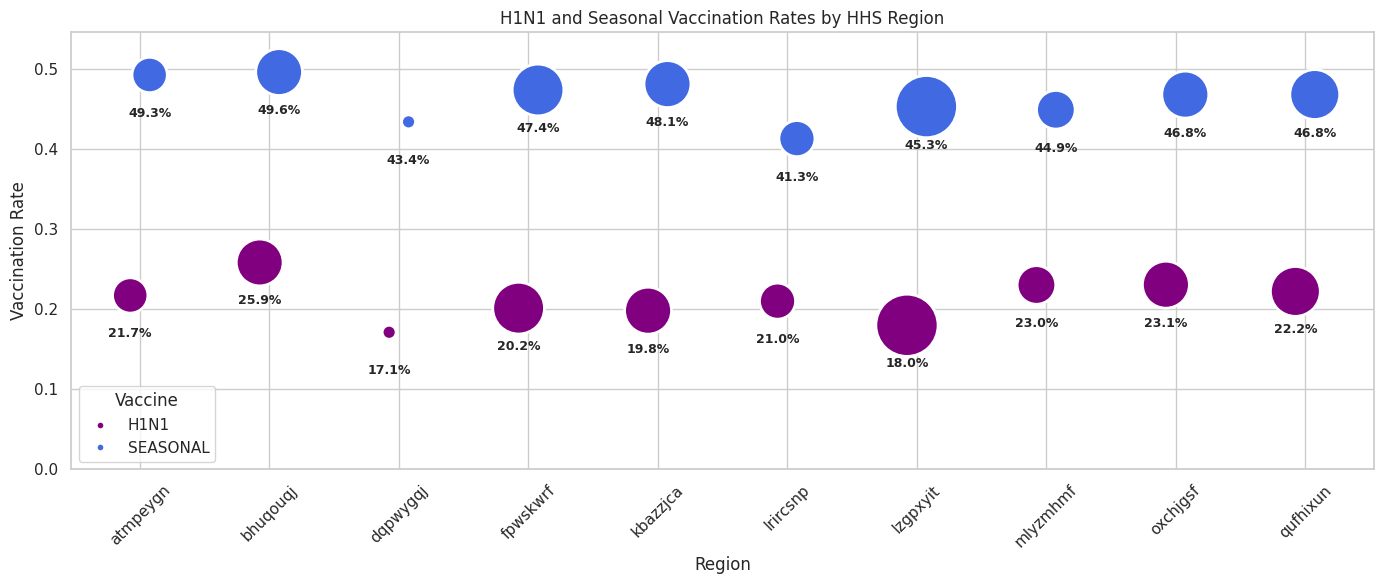

In [ ]:
####################################
# 1.3.4 Geo vaccination rates      #
####################################
vaccines = ['h1n1_vaccine', 'seasonal_vaccine']

bubble_df = pd.DataFrame()
for vac in vaccines:
    df_tmp = flu_df.groupby('hhs_geo_region').agg(
        vaccinated_rate=(vac, 'mean'),
        population=(vac, 'count')
    ).reset_index()
    df_tmp['vaccine'] = vac.replace('_vaccine','').upper()
    bubble_df = pd.concat([bubble_df, df_tmp], ignore_index=True)

size_scale = 1000
bubble_df['bubble_size'] = bubble_df['population'] / bubble_df['population'].max() * size_scale

regions = bubble_df['hhs_geo_region'].unique()
region_to_num = {r: i for i, r in enumerate(regions)}

offset = 0.15
bubble_df['x_pos'] = bubble_df.apply(
    lambda row: region_to_num[row['hhs_geo_region']] - offset/2
    if row['vaccine'] == 'H1N1' else region_to_num[row['hhs_geo_region']] + offset/2,
    axis=1
)

plt.figure(figsize=(14,6))
scatter = sns.scatterplot(
    data=bubble_df,
    x='x_pos',
    y='vaccinated_rate',
    size='bubble_size',
    sizes=(100, 2000),
    hue='vaccine',
    palette={'H1N1':'purple','SEASONAL':'royalblue'},
    legend='brief'
)

handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:3], labels=labels[1:3], title='Vaccine')

for i, row in bubble_df.iterrows():
    plt.text(
        x=row['x_pos'],
        y=max(0, row['vaccinated_rate'] - 0.04),
        s=f"{row['vaccinated_rate']*100:.1f}%",
        ha='center',
        va='top',
        fontsize=9,
        fontweight='bold'
    )

plt.xticks(ticks=range(len(regions)), labels=regions, rotation=45)
plt.ylabel('Vaccination Rate')
plt.xlabel('Region')
plt.title('H1N1 and Seasonal Vaccination Rates by HHS Region')
plt.ylim(0, 1.1 * bubble_df['vaccinated_rate'].max())
plt.tight_layout()
plt.show()


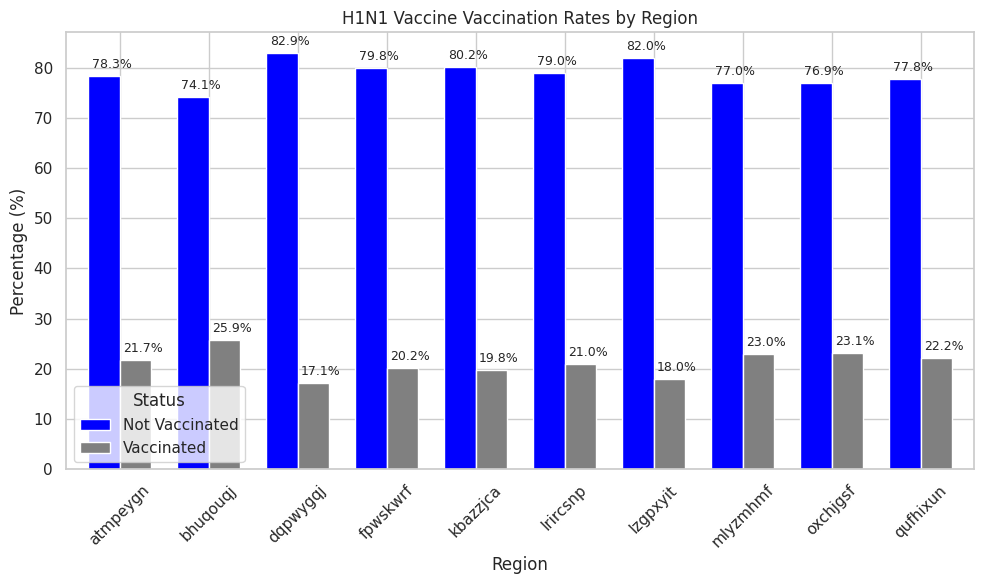

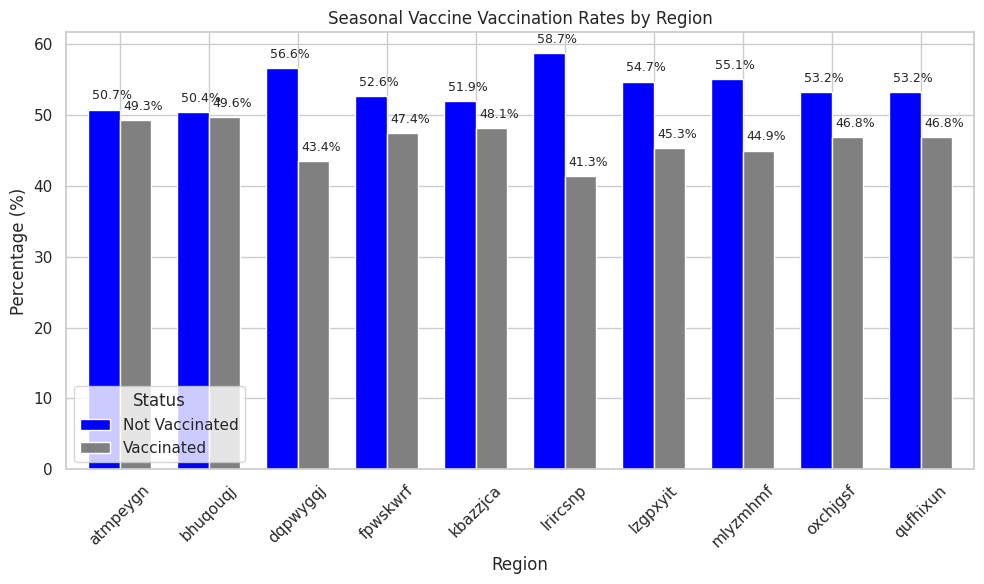

In [ ]:
for vac in vaccines:
    counts = flu_df.groupby(['hhs_geo_region', vac]).size().unstack(fill_value=0)
    counts.columns = ['Not Vaccinated', 'Vaccinated']

    prop = counts.div(counts.sum(axis=1), axis=0) * 100

    prop.plot(kind='bar', figsize=(10,6), color=['blue','grey'], width=0.7)
    plt.title(f"{vac.replace('_',' ').title()} Vaccination Rates by Region")
    plt.ylabel('Percentage (%)')
    plt.xlabel('Region')
    plt.xticks(rotation=45)
    plt.legend(title='Status', loc='lower left')

    for i, region in enumerate(prop.index):
        for j, status in enumerate(prop.columns):
            plt.text(
                x=i + (j-0.25)*0.35,
                y=prop.loc[region, status] + 1,
                s=f"{prop.loc[region, status]:.1f}%",
                ha='center',
                va='bottom',
                fontsize=9
            )

    plt.tight_layout()
    plt.show()


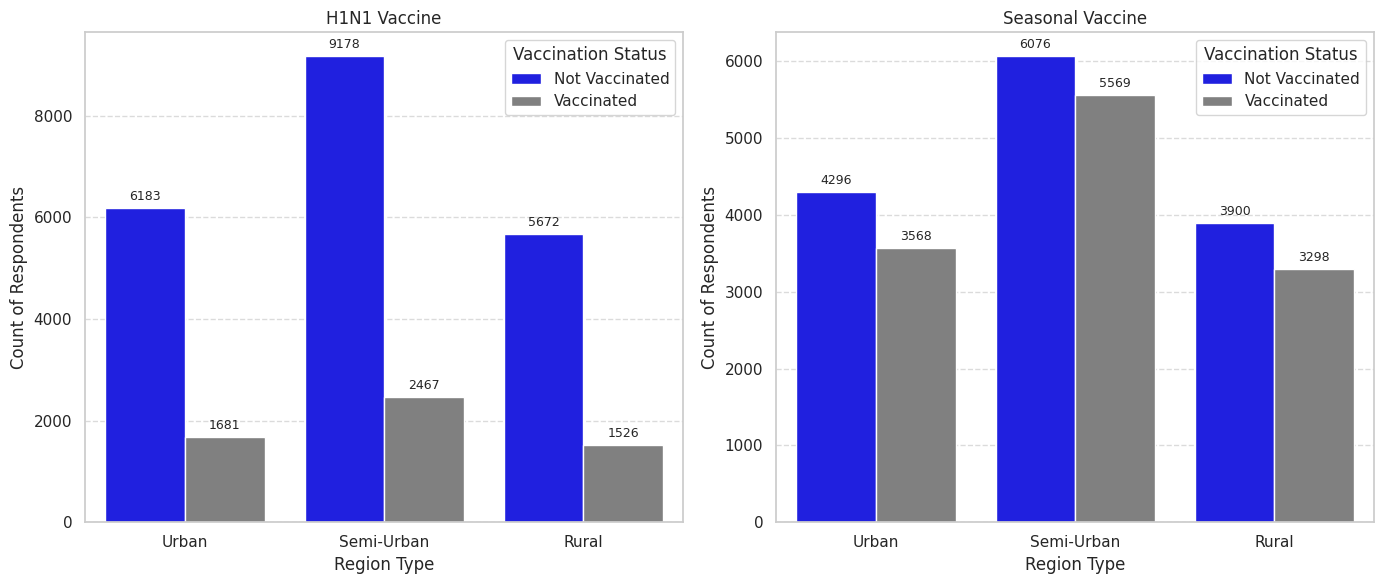

In [ ]:
flu_df['census_msa'] = flu_df['census_msa'].str.strip()
flu_df['census_msa'] = flu_df['census_msa'].replace({
    'MSA, Principle City': 'Urban',
    'MSA, Not Principle  City': 'Semi-Urban',
    'Non-MSA': 'Rural',
    'Rural': 'Rural',
    'Semi-Urban': 'Semi-Urban'
})

order = ['Urban', 'Semi-Urban', 'Rural']
flu_df['census_msa'] = pd.Categorical(flu_df['census_msa'], categories=order, ordered=True)

vaccines = ['h1n1_vaccine', 'seasonal_vaccine']
colors = {'Vaccinated': 'grey', 'Not Vaccinated': 'blue'}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, vac in enumerate(vaccines):

    flu_df['Vaccinated_Label'] = flu_df[vac].map({0: 'Not Vaccinated', 1: 'Vaccinated'})

    ax = sns.countplot(
        data=flu_df,
        x='census_msa',
        hue='Vaccinated_Label',
        palette=colors,
        order=order,
        ax=axes[i]
    )

    ax.set_title(vac.replace('_', ' ').title())
    ax.set_xlabel('Region Type')
    ax.set_ylabel('Count of Respondents')
    ax.legend(title='Vaccination Status')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + max(ax.get_ylim())*0.01,
                f"{int(height)}",
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.tight_layout()
plt.show()


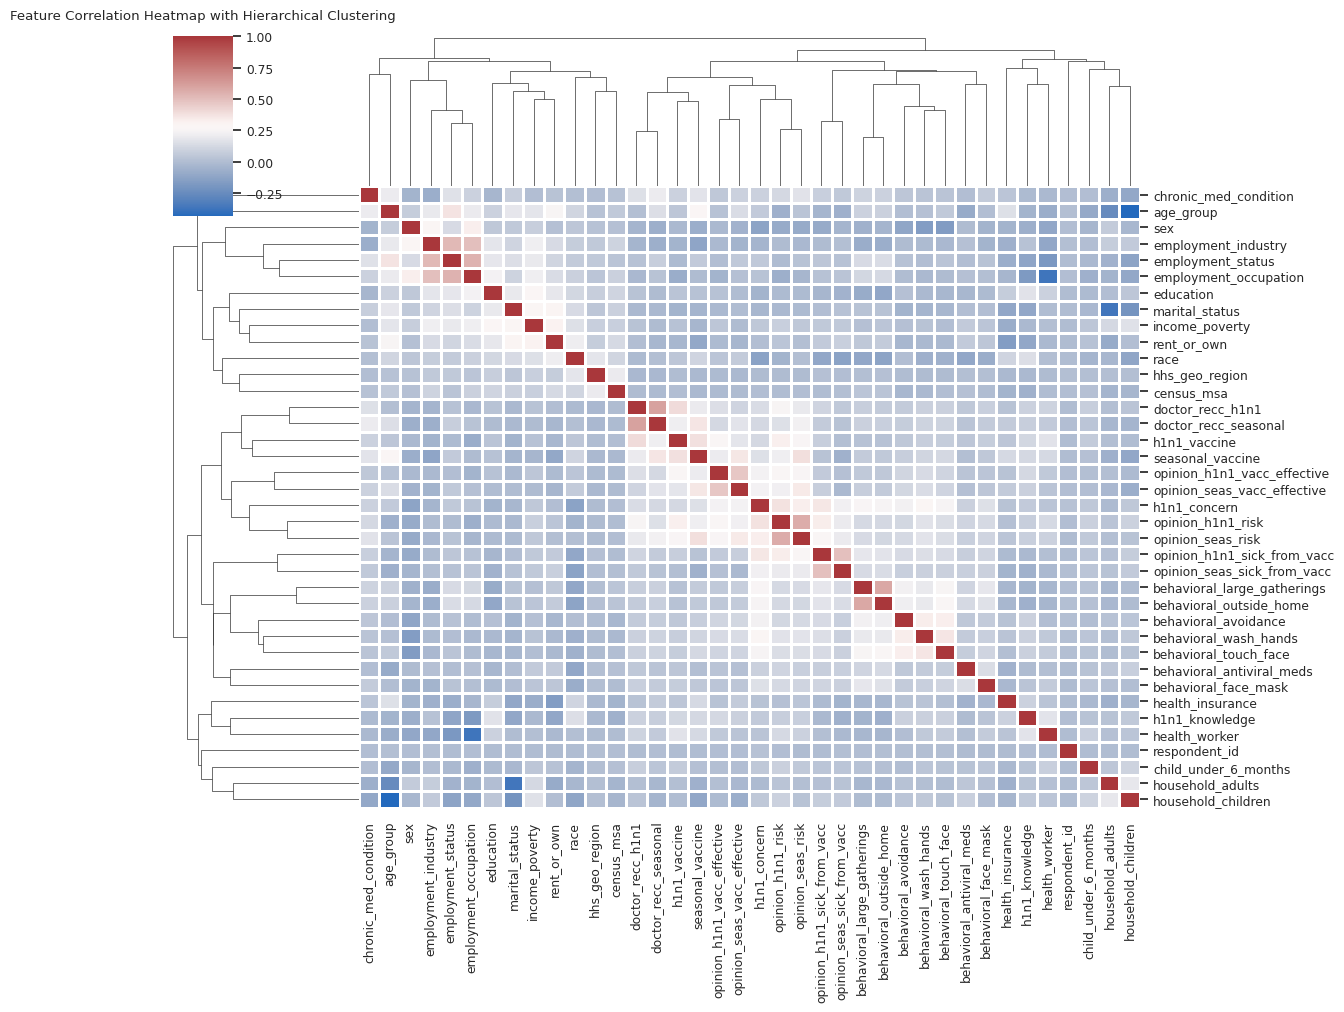

Highly correlated pairs (|r| > 0.5):


rent_or_own              rent_or_own                    0.999892
doctor_recc_seasonal     doctor_recc_h1n1               0.603152
behavioral_outside_home  behavioral_large_gatherings    0.580881
opinion_h1n1_risk        opinion_seas_risk              0.562976
employment_status        employment_occupation          0.539849
                         employment_industry            0.517492
dtype: float64

In [15]:
#########################
# 1.4. Feature Analysis #
#########################
# Ticket 1.4.1: Calculate correlation matrix for all features
# Separate numeric and categorical features
num_cols = flu_df.select_dtypes(include=np.number).columns
cat_cols = flu_df.select_dtypes(exclude=np.number).columns

# Function to compute Cramér’s V for categorical variables ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Encode categorical features for numeric correlation computation
le = LabelEncoder()
encoded_df = flu_df.copy()

for col in cat_cols:
    encoded_df[col] = le.fit_transform(flu_df[col].astype(str))

# Compute pairwise correlation matrix
cols = flu_df.columns
corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

for i in range(len(cols)):
    for j in range(i, len(cols)):
        col1, col2 = cols[i], cols[j]

        # Numeric–numeric
        if col1 in num_cols and col2 in num_cols:
            corr = encoded_df[[col1, col2]].corr(method='pearson').iloc[0, 1]

        # Categorical–categorical
        elif col1 in cat_cols and col2 in cat_cols:
            corr = cramers_v(flu_df[col1], flu_df[col2])

        # Mixed: numeric–categorical
        else:
            corr = pearsonr(encoded_df[col1], encoded_df[col2])[0]

        corr_matrix.loc[col1, col2] = corr
        corr_matrix.loc[col2, col1] = corr

# Step 5: Hierarchical clustering + Heatmap
sns.set(font_scale=0.8)
linkage = hierarchy.linkage(corr_matrix, method='average')
g = sns.clustermap(
    corr_matrix,
    cmap="vlag",
    linewidths=.75,
    figsize=(12, 10),
    row_linkage=linkage,
    col_linkage=linkage,
    annot=False
)
plt.title("Feature Correlation Heatmap with Hierarchical Clustering", y=1.05)
plt.show()

# Step 6: Display top correlated feature pairs
corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
top_corr = corr_unstacked[
    (corr_unstacked < 0.9999) & (corr_unstacked > 0.5)
].drop_duplicates()
print("Highly correlated pairs (|r| > 0.5):")
display(top_corr)

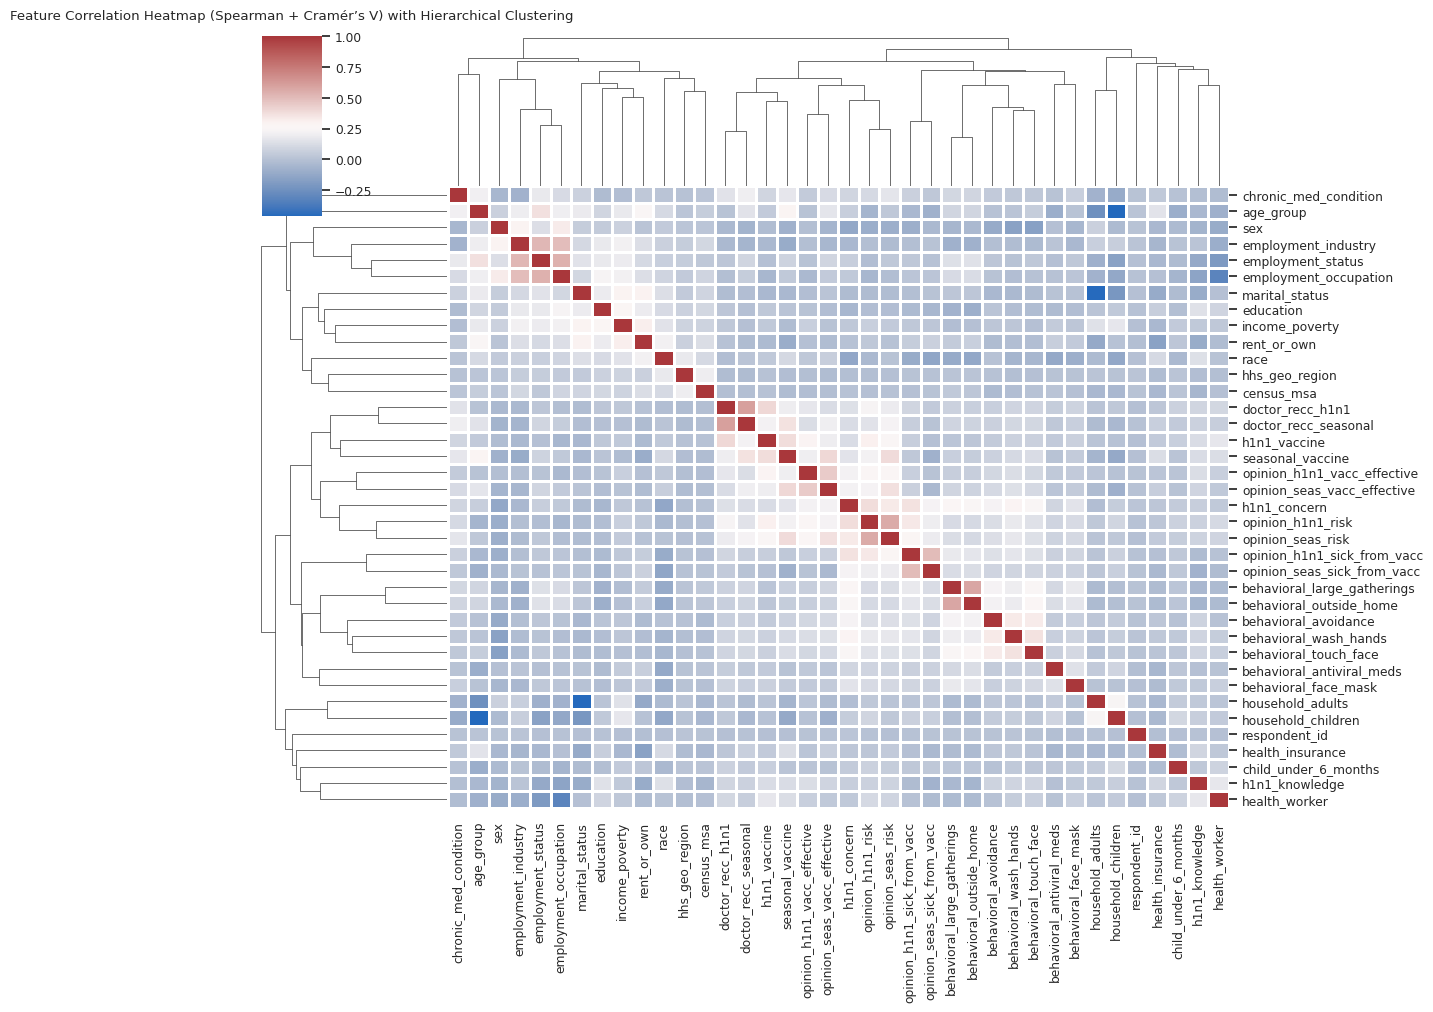

Highly correlated pairs (|r| > 0.5):


,,0
rent_or_own,rent_or_own,0.999892
doctor_recc_seasonal,doctor_recc_h1n1,0.603152
behavioral_outside_home,behavioral_large_gatherings,0.580881
opinion_h1n1_risk,opinion_seas_risk,0.562064
employment_status,employment_occupation,0.539849
employment_industry,employment_status,0.517492


In [16]:
#########################
# 1.4. Feature Analysis #
#########################
# Ticket 1.4.1: Calculate correlation matrix for all features
# Separate numeric and categorical features
from scipy.stats import chi2_contingency, spearmanr
from scipy.cluster import hierarchy
# Separate numeric and categorical features
num_cols = flu_df.select_dtypes(include=np.number).columns
cat_cols = flu_df.select_dtypes(exclude=np.number).columns

# Function to compute Cramér’s V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Encode categorical features for numeric correlation computation
le = LabelEncoder()
encoded_df = flu_df.copy()

for col in cat_cols:
    encoded_df[col] = le.fit_transform(flu_df[col].astype(str))

# Compute pairwise correlation matrix (Spearman for numeric features)
cols = flu_df.columns
corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

for i in range(len(cols)):
    for j in range(i, len(cols)):
        col1, col2 = cols[i], cols[j]

        # Numeric–numeric (use Spearman)
        if col1 in num_cols and col2 in num_cols:
            corr = encoded_df[[col1, col2]].corr(method='spearman').iloc[0, 1]

        # Categorical–categorical (use Cramér’s V)
        elif col1 in cat_cols and col2 in cat_cols:
            corr = cramers_v(flu_df[col1], flu_df[col2])

        # Mixed: numeric–categorical (use Spearman on label-encoded)
        else:
            corr = spearmanr(encoded_df[col1], encoded_df[col2])[0]

        corr_matrix.loc[col1, col2] = corr
        corr_matrix.loc[col2, col1] = corr

# Step 5: Hierarchical clustering + Heatmap
sns.set(font_scale=0.8)
linkage = hierarchy.linkage(corr_matrix, method='average')
g = sns.clustermap(
    corr_matrix,
    cmap="vlag",
    linewidths=.75,
    figsize=(12, 10),
    row_linkage=linkage,
    col_linkage=linkage,
    annot=False
)
plt.title("Feature Correlation Heatmap (Spearman + Cramér’s V) with Hierarchical Clustering", y=1.05)
plt.show()

# Step 6: Display top correlated feature pairs
corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
top_corr = corr_unstacked[
    (corr_unstacked < 0.9999) & (corr_unstacked > 0.5)
].drop_duplicates()
print("Highly correlated pairs (|r| > 0.5):")
display(top_corr)

In [ ]:
#  Ticket 1.4.2 Identify potentially redundant features
# Set correlation threshold
threshold = 0.85

# Find feature pairs with high correlation
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Remove duplicate and self-pairs
corr_pairs = corr_pairs[
    (corr_pairs['Feature_1'] != corr_pairs['Feature_2']) &
    (corr_pairs['Correlation'].abs() > threshold)
].copy()

# Drop mirror duplicates (A,B) and (B,A)
corr_pairs['sorted_pair'] = corr_pairs.apply(
    lambda x: '-'.join(sorted([str(x['Feature_1']), str(x['Feature_2'])])), axis=1
)
corr_pairs = corr_pairs.drop_duplicates(subset=['sorted_pair']).drop(columns='sorted_pair')

print("🔍 Highly correlated feature pairs (|r| > {:.2f}):".format(threshold))
display(corr_pairs.sort_values(by='Correlation', ascending=False))

# Identify potentially redundant features
avg_corr = (
    corr_matrix.abs()
    .where(~np.eye(corr_matrix.shape[0], dtype=bool))
    .mean()
    .sort_values(ascending=False)
)

# Suggest features to remove (those most correlated overall)
redundant_features = avg_corr[avg_corr > 0.6].index.tolist()

print("\n Features with high average correlation (potentially redundant):")
for f in redundant_features:
    print(f" - {f}")
print(corr_pairs.sort_values(by='Correlation', ascending=False).head(10).to_string())

🔍 Highly correlated feature pairs (|r| > 0.85):


,Feature_1,Feature_2,Correlation



 Features with high average correlation (potentially redundant):
Empty DataFrame
Columns: [Feature_1, Feature_2, Correlation]
Index: []


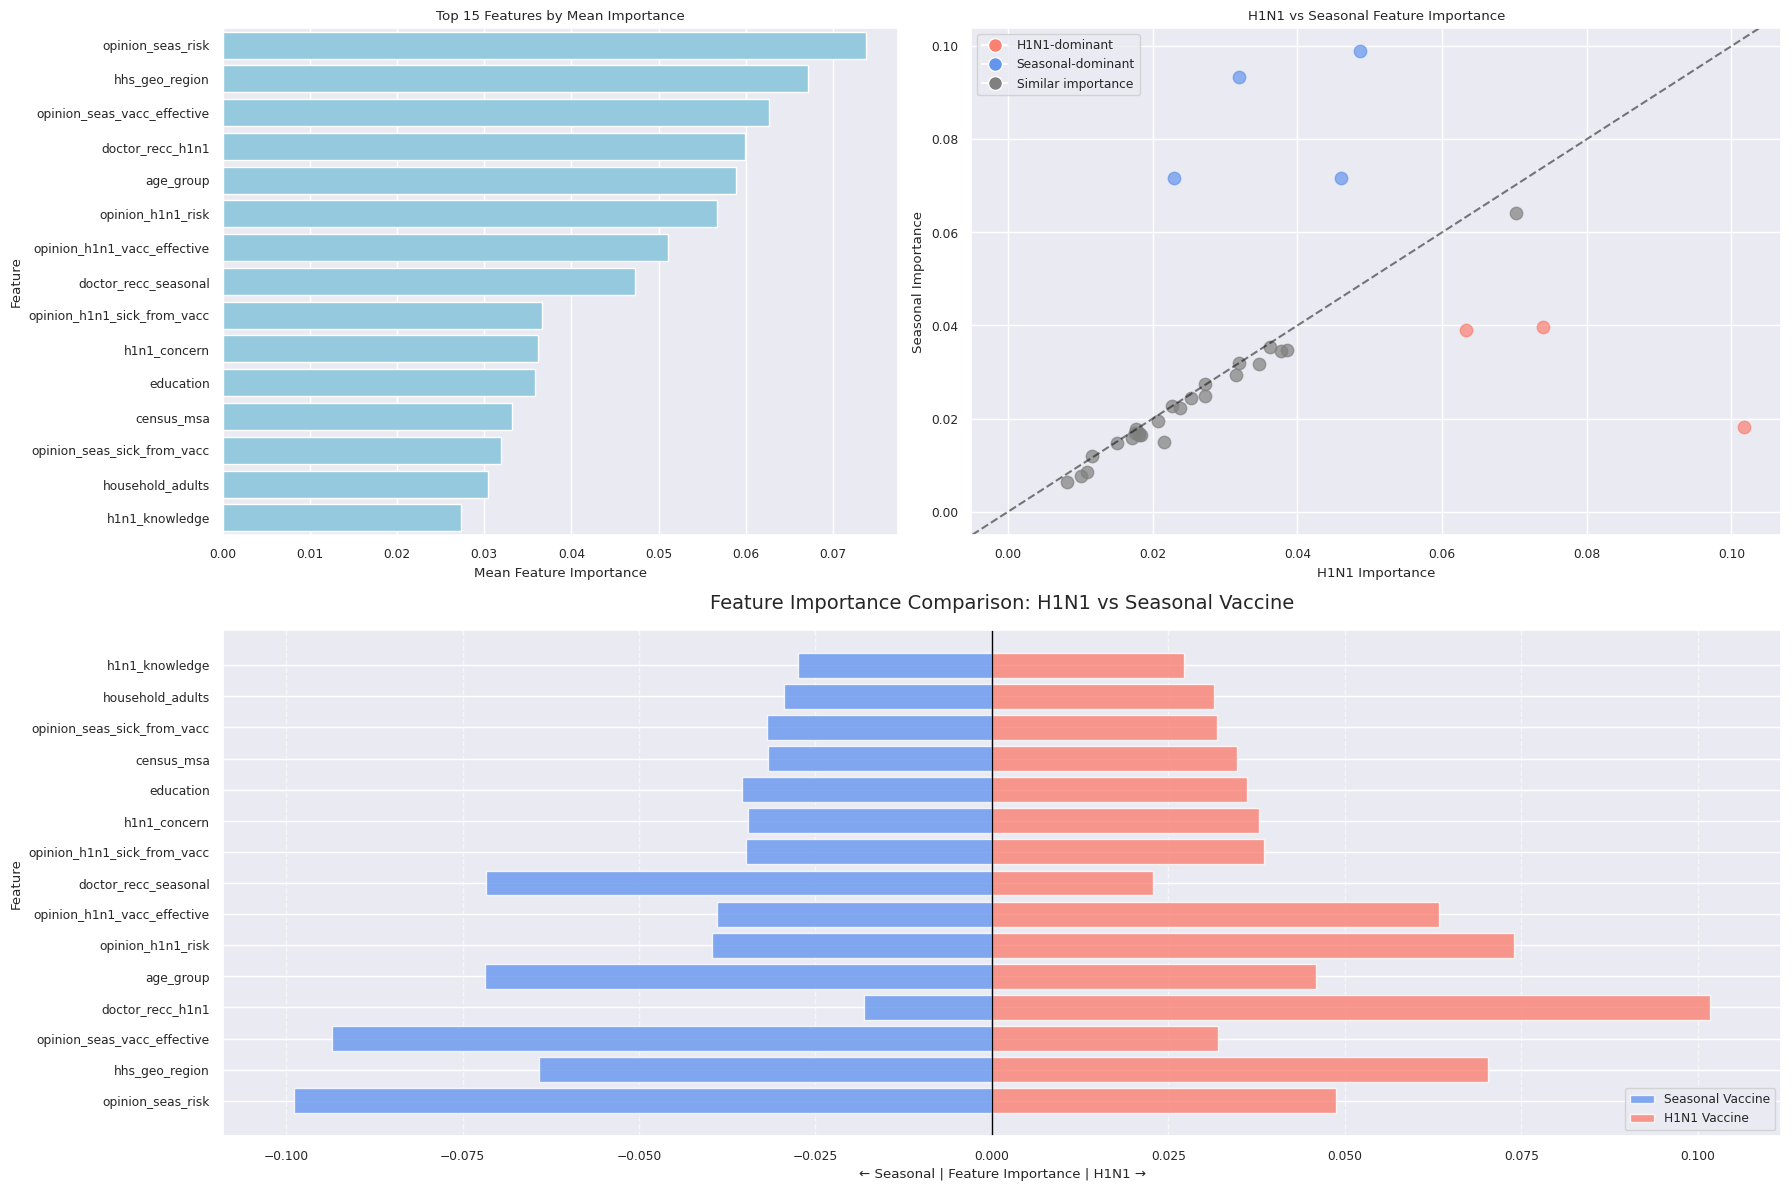

In [ ]:
# Ticket 1.4.3: Conduct preliminary feature analysis
from scipy.stats import spearmanr
from matplotlib.lines import Line2D
from sklearn.ensemble import RandomForestClassifier
# Define features and targets (drop respondent_id)
target_h1n1 = 'h1n1_vaccine'
target_seasonal = 'seasonal_vaccine'

# Drop respondent_id along with the targets
X = flu_df.drop(columns=[target_h1n1, target_seasonal, 'respondent_id'])
y_h1n1 = flu_df[target_h1n1]
y_seasonal = flu_df[target_seasonal]

# Encode categorical variables
X_encoded = X.copy()
for col in X_encoded.select_dtypes(exclude=np.number).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))


# Train Random Forest models
rf_h1n1 = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_seasonal = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

rf_h1n1.fit(X_encoded, y_h1n1)
rf_seasonal.fit(X_encoded, y_seasonal)


# Extract feature importances and proceed as before
importance_h1n1 = pd.Series(rf_h1n1.feature_importances_, index=X_encoded.columns)
importance_seasonal = pd.Series(rf_seasonal.feature_importances_, index=X_encoded.columns)

importance_df = pd.DataFrame({
    'H1N1_Importance': importance_h1n1,
    'Seasonal_Importance': importance_seasonal
})
importance_df['Mean_Importance'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values('Mean_Importance', ascending=False)

# Color-coding based on dominance
def feature_color(row, threshold=0.01):
    diff = row['H1N1_Importance'] - row['Seasonal_Importance']
    if abs(diff) <= threshold:
        return 'gray'        # similar importance
    elif diff > 0:
        return 'salmon'      # H1N1-dominant
    else:
        return 'cornflowerblue'  # Seasonal-dominant

importance_df['color'] = importance_df.apply(feature_color, axis=1)


# Visualization
top_n = 15
top_features = importance_df.head(top_n).reset_index()

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1])

# Barplot
ax0 = fig.add_subplot(gs[0, 0])
sns.barplot(data=top_features, x='Mean_Importance', y='index', color='skyblue', ax=ax0)
ax0.set_title('Top 15 Features by Mean Importance')
ax0.set_xlabel('Mean Feature Importance')
ax0.set_ylabel('Feature')

# Scatterplot
ax1 = fig.add_subplot(gs[0, 1])
for _, row in importance_df.iterrows():
    ax1.scatter(row['H1N1_Importance'], row['Seasonal_Importance'], color=row['color'], s=80, alpha=0.7)
ax1.set_title('H1N1 vs Seasonal Feature Importance')
ax1.set_xlabel('H1N1 Importance')
ax1.set_ylabel('Seasonal Importance')
ax1.grid(True)
ax1.axline((0, 0), slope=1, linestyle='--', color='black', alpha=0.5)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='H1N1-dominant'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='cornflowerblue', markersize=10, label='Seasonal-dominant'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Similar importance')
]
ax1.legend(handles=legend_elements, loc='upper left')

# Horizontal bar chart
ax2 = fig.add_subplot(gs[1, :])
ax2.barh(top_features['index'], -top_features['Seasonal_Importance'], color='cornflowerblue', alpha=0.8, label='Seasonal Vaccine')
ax2.barh(top_features['index'], top_features['H1N1_Importance'], color='salmon', alpha=0.8, label='H1N1 Vaccine')
ax2.set_title('Feature Importance Comparison: H1N1 vs Seasonal Vaccine', fontsize=14, pad=15)
ax2.set_xlabel('← Seasonal | Feature Importance | H1N1 →')
ax2.set_ylabel('Feature')
ax2.axvline(0, color='black', linewidth=1)
ax2.legend(loc='lower right')
ax2.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [ ]:
#To get the top 10 important features for seasonal_vaccine and H1n1_ vaccine
top_h1n1 = importance_df.sort_values('H1N1_Importance', ascending=False).head(10)['H1N1_Importance']
top_seasonal = importance_df.sort_values('Seasonal_Importance', ascending=False).head(10)['Seasonal_Importance']

# Combine into a single table
top_features_table = pd.DataFrame({
    'H1N1_Top10_Feature': top_h1n1.index,
    'H1N1_Importance': top_h1n1.values,
    'Seasonal_Top10_Feature': top_seasonal.index,
    'Seasonal_Importance': top_seasonal.values
})

# Display table
print(" Top 10 Features by Vaccine Type:")
display(top_features_table)

 Top 10 Features by Vaccine Type:


,H1N1_Top10_Feature,H1N1_Importance,Seasonal_Top10_Feature,Seasonal_Importance
0,doctor_recc_h1n1,0.101784,opinion_seas_risk,0.098903
1,opinion_h1n1_risk,0.073923,opinion_seas_vacc_effective,0.093434
2,hhs_geo_region,0.070216,age_group,0.071760
3,opinion_h1n1_vacc_effective,0.063267,doctor_recc_seasonal,0.071700
4,opinion_seas_risk,0.048686,hhs_geo_region,0.064134
5,age_group,0.045955,opinion_h1n1_risk,0.039593
6,opinion_h1n1_sick_from_vacc,0.038536,opinion_h1n1_vacc_effective,0.038948
7,h1n1_concern,0.037770,education,0.035397
8,education,0.036196,opinion_h1n1_sick_from_vacc,0.034775
9,census_msa,0.034649,h1n1_concern,0.034521
